In [646]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from IPython.display import display, HTML


In [647]:
# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df = pd.read_csv("predictions.csv")


In [648]:
df

user_id  ÏÑ±Î≥Ñ     Ïó∞Î†πÎåÄ  ÎÇòÏù¥      ÌÇ§  ÌòÑÏû¨ Ï≤¥Ï§ë  Î™©Ìëú Ï≤¥Ï§ë   BMI  ÌóàÎ¶¨ÎëòÎ†à  ÏàòÏ∂ïÍ∏∞ÌòàÏïï(ÏµúÍ≥† ÌòàÏïï)  \
0      user_0  ÎÇ®ÏÑ±  60ÎåÄ Ïù¥ÏÉÅ  73  166.7   78.1   50.5  28.1  89.6           160   
1      user_1  ÎÇ®ÏÑ±  60ÎåÄ Ïù¥ÏÉÅ  75  167.8   90.6   75.1  32.2  99.0           166   
2      user_2  Ïó¨ÏÑ±     20ÎåÄ  29  163.6   55.4   77.8  20.7  91.5           133   
3      user_3  Ïó¨ÏÑ±     50ÎåÄ  53  159.8   84.9   67.1  33.2  92.3           153   
4      user_4  ÎÇ®ÏÑ±     50ÎåÄ  56  158.6   82.5   68.5  32.8  79.3           151   
..        ...  ..     ...  ..    ...    ...    ...   ...   ...           ...   
296  user_296  Ïó¨ÏÑ±     30ÎåÄ  38  180.9   53.7   57.8  16.4  81.7           130   
297  user_297  Ïó¨ÏÑ±  60ÎåÄ Ïù¥ÏÉÅ  73  173.8   75.0   55.0  24.8  74.3           161   
298  user_298  Ïó¨ÏÑ±     50ÎåÄ  55  165.1   96.5   55.8  35.4  82.3           160   
299  user_299  ÎÇ®ÏÑ±     40ÎåÄ  45  161.7   70.5   62.5  27.0  76.1           146   
300  user_300  Ïó¨ÏÑ±     10ÎåÄ  16  155.3   72.2   59.0  29.9  86.6           133   

     ... ÌôúÎèô ÏàòÏ§Ä   Ìù°Ïó∞ÏÉÅÌÉú  ÏùåÏ£ºÏó¨Î∂Ä Í∞Ñ ÏßÄÌëú  ÎπÑÎßå ÏúÑÌóò ÏßÄÏàò Ïö¥Îèô Í∞úÏÑ† ÌïÑÏöîÏÑ±  Ïö¥Îèô Ï†êÏàò  ÏãùÎã® Í∞úÏÑ† ÌïÑÏöîÏÑ±  ÏãùÎã® Ï†êÏàò  \
0    ...  Ï§ëÍ∞ÑÌôúÎèô  Í≥ºÍ±∞ Ìù°Ïó∞    Í∞ÄÎÅî   Í≤ΩÍ≥Ñ      43.0        49     61         55     46   
1    ...   Ï†ÄÌôúÎèô    ÎπÑÌù°Ïó∞    Í∞ÄÎÅî   ÏúÑÌóò      47.2        46     27         43     68   
2    ...   Ï†ÄÌôúÎèô  ÌòÑÏû¨ Ìù°Ïó∞    ÏûêÏ£º   Ï†ïÏÉÅ      42.4        75     34         52     47   
3    ...  Ï§ëÍ∞ÑÌôúÎèô  Í≥ºÍ±∞ Ìù°Ïó∞   ÎπÑÏùåÏ£º   ÏúÑÌóò      46.3        56     51         55     43   
4    ...   Ï†ÄÌôúÎèô    ÎπÑÌù°Ïó∞    Í∞ÄÎÅî   ÏúÑÌóò      44.2        55     35         56     49   
..   ...   ...    ...   ...  ...       ...       ...    ...        ...    ...   
296  ...   Í≥†ÌôúÎèô    ÎπÑÌù°Ïó∞    ÏûêÏ£º   Ï†ïÏÉÅ      35.7        72     95         40     45   
297  ...   Ï†ÄÌôúÎèô  ÌòÑÏû¨ Ìù°Ïó∞   ÎπÑÏùåÏ£º   Í≤ΩÍ≥Ñ      37.9        51     29         49     60   
298  ...   Í≥†ÌôúÎèô    ÎπÑÌù°Ïó∞    Í∞ÄÎÅî   ÏúÑÌóò      44.7        54     96         45     63   
299  ...   Ï†ÄÌôúÎèô    ÎπÑÌù°Ïó∞    Í∞ÄÎÅî   Í≤ΩÍ≥Ñ      41.2        64     44         65     16   
300  ...  Ï§ëÍ∞ÑÌôúÎèô  Í≥ºÍ±∞ Ìù°Ïó∞    ÏûêÏ£º   ÏúÑÌóò      42.7        77     58         44     52   

                          ÏòàÏ∏° ÎÇ†Ïßú  
0    2024-12-09 07:05:46.881297  
1    2024-11-25 07:05:46.881297  
2    2024-10-31 07:05:46.881297  
3    2024-11-22 07:05:46.881297  
4    2024-08-04 07:05:46.881297  
..                          ...  
296  2024-11-08 07:05:46.881297  
297  2024-04-12 07:05:46.881297  
298  2025-02-18 07:05:46.881297  
299  2024-12-20 07:05:46.881297  
300  2024-11-04 07:05:46.881297  

[301 rows x 30 columns]

In [649]:
df.head()

user_id  ÏÑ±Î≥Ñ     Ïó∞Î†πÎåÄ  ÎÇòÏù¥      ÌÇ§  ÌòÑÏû¨ Ï≤¥Ï§ë  Î™©Ìëú Ï≤¥Ï§ë   BMI  ÌóàÎ¶¨ÎëòÎ†à  ÏàòÏ∂ïÍ∏∞ÌòàÏïï(ÏµúÍ≥† ÌòàÏïï)  ...  \
0  user_0  ÎÇ®ÏÑ±  60ÎåÄ Ïù¥ÏÉÅ  73  166.7   78.1   50.5  28.1  89.6           160  ...   
1  user_1  ÎÇ®ÏÑ±  60ÎåÄ Ïù¥ÏÉÅ  75  167.8   90.6   75.1  32.2  99.0           166  ...   
2  user_2  Ïó¨ÏÑ±     20ÎåÄ  29  163.6   55.4   77.8  20.7  91.5           133  ...   
3  user_3  Ïó¨ÏÑ±     50ÎåÄ  53  159.8   84.9   67.1  33.2  92.3           153  ...   
4  user_4  ÎÇ®ÏÑ±     50ÎåÄ  56  158.6   82.5   68.5  32.8  79.3           151  ...   

  ÌôúÎèô ÏàòÏ§Ä   Ìù°Ïó∞ÏÉÅÌÉú  ÏùåÏ£ºÏó¨Î∂Ä Í∞Ñ ÏßÄÌëú  ÎπÑÎßå ÏúÑÌóò ÏßÄÏàò Ïö¥Îèô Í∞úÏÑ† ÌïÑÏöîÏÑ±  Ïö¥Îèô Ï†êÏàò  ÏãùÎã® Í∞úÏÑ† ÌïÑÏöîÏÑ±  ÏãùÎã® Ï†êÏàò  \
0  Ï§ëÍ∞ÑÌôúÎèô  Í≥ºÍ±∞ Ìù°Ïó∞    Í∞ÄÎÅî   Í≤ΩÍ≥Ñ      43.0        49     61         55     46   
1   Ï†ÄÌôúÎèô    ÎπÑÌù°Ïó∞    Í∞ÄÎÅî   ÏúÑÌóò      47.2        46     27         43     68   
2   Ï†ÄÌôúÎèô  ÌòÑÏû¨ Ìù°Ïó∞    ÏûêÏ£º   Ï†ïÏÉÅ      42.4        75     34         52     47   
3  Ï§ëÍ∞ÑÌôúÎèô  Í≥ºÍ±∞ Ìù°Ïó∞   ÎπÑÏùåÏ£º   ÏúÑÌóò      46.3        56     51         55     43   
4   Ï†ÄÌôúÎèô    ÎπÑÌù°Ïó∞    Í∞ÄÎÅî   ÏúÑÌóò      44.2        55     35         56     49   

                        ÏòàÏ∏° ÎÇ†Ïßú  
0  2024-12-09 07:05:46.881297  
1  2024-11-25 07:05:46.881297  
2  2024-10-31 07:05:46.881297  
3  2024-11-22 07:05:46.881297  
4  2024-08-04 07:05:46.881297  

[5 rows x 30 columns]

In [650]:
def merge_columns(df, columns, target_column):
    """ÏßÄÏ†ïÎêú Ïª¨ÎüºÎì§Ïùò Îç∞Ïù¥ÌÑ∞Î•º Î≥ëÌï©ÌïòÏó¨ target_columnÏúºÎ°ú ÎßåÎì≠ÎãàÎã§."""
    df[target_column] = df[columns].apply(
        lambda row: next((val for val in row if pd.notna(val)), np.nan), axis=1
    )
    return df


In [651]:
# ÎèôÏùºÌïú ÏùòÎØ∏Ïùò Ï§ëÎ≥µ Ïª¨Îüº Î¶¨Ïä§Ìä∏
duplicate_columns = {
    "user_id": ["user_id"],
    "ÏÑ±Î≥Ñ": ["ÏÑ±Î≥Ñ", "gender"],
    "ÎÇòÏù¥": ["ÎÇòÏù¥", "age"],
    "Ïó∞Î†πÎåÄ": ["Ïó∞Î†πÎåÄ", "age"],
    "BMI": ["BMI"],
    "ÌòÑÏû¨ Ï≤¥Ï§ë": ["ÌòÑÏû¨ Ï≤¥Ï§ë", "weight"],
    "Î™©Ìëú Ï≤¥Ï§ë": ["Î™©Ìëú Ï≤¥Ï§ë", "goal_weight"],
    "Ïö¥Îèô Í∞úÏÑ† ÌïÑÏöîÏÑ±": ["Ïö¥Îèô Í∞ÄÎä•ÏÑ±",'ÎπÑÎßå ÏúÑÌóò ÏßÄÏàòÏö¥Îèô Í∞ÄÎä•ÏÑ±',"Ïö¥Îèô Í∞úÏÑ† ÌïÑÏöîÏÑ±"],
    "Ïö¥Îèô Ï†êÏàò": ["Ïö¥Îèô Ï†êÏàò", "Ïö¥Îèô ÌôïÎ•†"],
    "ÏãùÎã® Í∞úÏÑ† ÌïÑÏöîÏÑ±": ["ÏãùÎã® Í∞úÏÑ† ÌïÑÏöîÏÑ±"],
    "ÏãùÎã® Ï†êÏàò": ["ÏãùÎã® ÌôïÎ•†", "ÏãùÎã® Ï†êÏàò"],
    "ÏòàÏ∏° ÎÇ†Ïßú": ["ÏòàÏ∏° ÎÇ†Ïßú"],
    "ÌóàÎ¶¨ÎëòÎ†à": ["ÌóàÎ¶¨ÎëòÎ†à (cm)", "ÌóàÎ¶¨ÎëòÎ†à (cm).1", "waist", "ÌóàÎ¶¨ÎëòÎ†à"],
    "ÌÇ§": ["ÌÇ§ (cm)", "height"],
    "ÏàòÏ∂ïÍ∏∞ÌòàÏïï(ÏµúÍ≥† ÌòàÏïï)": ["ÏàòÏ∂ïÍ∏∞ÌòàÏïï(ÏµúÍ≥† ÌòàÏïï)", "systolic_bp"],
    "Ïù¥ÏôÑÍ∏∞ÌòàÏïï(ÏµúÏ†Ä ÌòàÏïï)": ["Ïù¥ÏôÑÍ∏∞ÌòàÏïï(ÏµúÏ†Ä ÌòàÏïï)", "diastolic_bp"],
    "Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§": ["ÏΩúÎ†àÏä§ÌÖåÎ°§ ÏßÄÏàò", "cholesterol", "Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§"],
    "ÌôúÎèô ÏàòÏ§Ä": ["ÌôúÎèô ÏàòÏ§Ä", "activity_level", "activity_level_code"],
    "HDLÏΩúÎ†àÏä§ÌÖåÎ°§": ["HDLÏΩúÎ†àÏä§ÌÖåÎ°§"],
    "LDLÏΩúÎ†àÏä§ÌÖåÎ°§": ["LDLÏΩúÎ†àÏä§ÌÖåÎ°§"],
    "Ìä∏Î¶¨Í∏ÄÎ¶¨ÏÑ∏ÎùºÏù¥Îìú": ["Ìä∏Î¶¨Í∏ÄÎ¶¨ÏÑ∏ÎùºÏù¥Îìú"],
    "Ìù°Ïó∞ÏÉÅÌÉú": ["Ìù°Ïó∞ÏÉÅÌÉú"],
    "ÏùåÏ£ºÏó¨Î∂Ä": ["ÏùåÏ£ºÏó¨Î∂Ä"],
    "ÌòàÏïï Ï∞®Ïù¥": ["ÌòàÏïï Ï∞®Ïù¥"],
    "Í≥†ÌòàÎãπ ÏúÑÌóò": ["Í≥†ÌòàÎãπ ÏúÑÌóò"],
    "Í∞Ñ ÏßÄÌëú": ["Í∞Ñ ÏßÄÌëú"],
    "ÎπÑÎßå ÏúÑÌóò ÏßÄÏàò": ["ÎπÑÎßå ÏúÑÌóò ÏßÄÏàò"],
    "ÏãùÏ†ÑÌòàÎãπ(Í≥µÎ≥µÌòàÎãπ)": ["ÏãùÏ†ÑÌòàÎãπ(Í≥µÎ≥µÌòàÎãπ)"]
}


In [652]:
# Í∞Å Í∑∏Î£πÏùò Ïª¨ÎüºÎì§ÏùÑ Î≥ëÌï©ÌïòÍ≥† ÎåÄÌëú Ïª¨ÎüºÏúºÎ°ú Ïù¥Î¶ÑÏùÑ Î≥ÄÍ≤ΩÌï©ÎãàÎã§
for rep_col, dup_cols in duplicate_columns.items():
    if len(dup_cols) > 1:
        existing_cols = [col for col in dup_cols if col in df.columns]
        if existing_cols:
            df = merge_columns(df, existing_cols, rep_col)
            # ÏõêÎûò Ïª¨ÎüºÎì§ ÏÇ≠Ï†ú (ÎåÄÌëú Ïª¨Îüº Ï†úÏô∏)
            df.drop(columns=[col for col in existing_cols if col != rep_col], inplace=True)
    elif dup_cols[0] in df.columns and dup_cols[0] != rep_col:
        # Ïª¨Îüº Ïù¥Î¶ÑÎßå Î≥ÄÍ≤Ω
        df.rename(columns={dup_cols[0]: rep_col}, inplace=True)

In [675]:
# Í≤∞Í≥º ÌôïÏù∏
print(df.columns)

Index(['user_id', 'ÏÑ±Î≥Ñ', 'Ïó∞Î†πÎåÄ', 'ÎÇòÏù¥', 'ÌÇ§', 'ÌòÑÏû¨ Ï≤¥Ï§ë', 'Î™©Ìëú Ï≤¥Ï§ë', 'BMI', 'ÌóàÎ¶¨ÎëòÎ†à',
       'ÏàòÏ∂ïÍ∏∞ÌòàÏïï(ÏµúÍ≥† ÌòàÏïï)', 'Í≥†ÌòàÎãπ ÏúÑÌóò', 'Ïù¥ÏôÑÍ∏∞ÌòàÏïï(ÏµúÏ†Ä ÌòàÏïï)', 'ÏãùÏ†ÑÌòàÎãπ(Í≥µÎ≥µÌòàÎãπ)', 'Í≥†ÌòàÏïï ÏúÑÌóò',
       'ÌòàÏïï Ï∞®Ïù¥', 'Í≥†ÌòàÎãπ ÏúÑÌóò', 'Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§', 'HDLÏΩúÎ†àÏä§ÌÖåÎ°§', 'LDLÏΩúÎ†àÏä§ÌÖåÎ°§', 'Ìä∏Î¶¨Í∏ÄÎ¶¨ÏÑ∏ÎùºÏù¥Îìú',
       'ÌôúÎèô ÏàòÏ§Ä', 'Ìù°Ïó∞ÏÉÅÌÉú', 'ÏùåÏ£ºÏó¨Î∂Ä', 'Í∞Ñ ÏßÄÌëú', 'ÎπÑÎßå ÏúÑÌóò ÏßÄÏàò', 'Ïö¥Îèô Í∞úÏÑ† ÌïÑÏöîÏÑ±', 'Ïö¥Îèô Ï†êÏàò',
       'ÏãùÎã® Í∞úÏÑ† ÌïÑÏöîÏÑ±', 'ÏãùÎã® Ï†êÏàò', 'ÏòàÏ∏° ÎÇ†Ïßú'],
      dtype='object')


In [676]:
df.columns.nunique()

29

In [677]:
new_columns = ['user_id', 'ÏÑ±Î≥Ñ', 'Ïó∞Î†πÎåÄ', 'ÎÇòÏù¥', 'ÌÇ§', 'ÌòÑÏû¨ Ï≤¥Ï§ë', 'Î™©Ìëú Ï≤¥Ï§ë', 'BMI', 'ÌóàÎ¶¨ÎëòÎ†à',
               "ÏàòÏ∂ïÍ∏∞ÌòàÏïï(ÏµúÍ≥† ÌòàÏïï)", 'Í≥†ÌòàÎãπ ÏúÑÌóò',"Ïù¥ÏôÑÍ∏∞ÌòàÏïï(ÏµúÏ†Ä ÌòàÏïï)", 'ÏãùÏ†ÑÌòàÎãπ(Í≥µÎ≥µÌòàÎãπ)', 'Í≥†ÌòàÏïï ÏúÑÌóò','ÌòàÏïï Ï∞®Ïù¥','Í≥†ÌòàÎãπ ÏúÑÌóò', 'Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§', 'HDLÏΩúÎ†àÏä§ÌÖåÎ°§', 'LDLÏΩúÎ†àÏä§ÌÖåÎ°§', 
               'Ìä∏Î¶¨Í∏ÄÎ¶¨ÏÑ∏ÎùºÏù¥Îìú', 'ÌôúÎèô ÏàòÏ§Ä', 'Ìù°Ïó∞ÏÉÅÌÉú', 'ÏùåÏ£ºÏó¨Î∂Ä', 'Í∞Ñ ÏßÄÌëú', 'ÎπÑÎßå ÏúÑÌóò ÏßÄÏàò',
               'Ïö¥Îèô Í∞úÏÑ† ÌïÑÏöîÏÑ±', 'Ïö¥Îèô Ï†êÏàò', 'ÏãùÎã® Í∞úÏÑ† ÌïÑÏöîÏÑ±', 'ÏãùÎã® Ï†êÏàò', 'ÏòàÏ∏° ÎÇ†Ïßú']

In [678]:
df = df.reindex(columns=new_columns)

In [679]:
df.head()

user_id  ÏÑ±Î≥Ñ     Ïó∞Î†πÎåÄ  ÎÇòÏù¥      ÌÇ§  ÌòÑÏû¨ Ï≤¥Ï§ë  Î™©Ìëú Ï≤¥Ï§ë   BMI  ÌóàÎ¶¨ÎëòÎ†à  ÏàòÏ∂ïÍ∏∞ÌòàÏïï(ÏµúÍ≥† ÌòàÏïï)  ...  \
0  user_0  Ïó¨ÏÑ±  60ÎåÄ Ïù¥ÏÉÅ  74  190.0   58.2   74.3  16.1  85.3           132  ...   
1  user_1  Ïó¨ÏÑ±     20ÎåÄ  23  172.4   75.2   55.4  25.3  85.3           122  ...   
2  user_2  Ïó¨ÏÑ±     40ÎåÄ  42  170.7   93.7   44.5  32.2  90.6           126  ...   
3  user_3  ÎÇ®ÏÑ±     50ÎåÄ  51  169.6   38.4   67.5  13.3  54.2           123  ...   
4  user_4  ÎÇ®ÏÑ±  60ÎåÄ Ïù¥ÏÉÅ  76  186.6   63.1   75.0  18.1  71.9           135  ...   

  ÌôúÎèô ÏàòÏ§Ä   Ìù°Ïó∞ÏÉÅÌÉú  ÏùåÏ£ºÏó¨Î∂Ä Í∞Ñ ÏßÄÌëú  ÎπÑÎßå ÏúÑÌóò ÏßÄÏàò Ïö¥Îèô Í∞úÏÑ† ÌïÑÏöîÏÑ±  Ïö¥Îèô Ï†êÏàò  ÏãùÎã® Í∞úÏÑ† ÌïÑÏöîÏÑ±  ÏãùÎã® Ï†êÏàò  \
0  Ï§ëÍ∞ÑÌôúÎèô  Í≥ºÍ±∞ Ìù°Ïó∞    Í∞ÄÎÅî   Ï†ïÏÉÅ      38.2        54     55         47     41   
1   Ï†ÄÌôúÎèô    ÎπÑÌù°Ïó∞   ÎπÑÏùåÏ£º   Í≤ΩÍ≥Ñ      40.9        75     23         42     59   
2   Ï†ÄÌôúÎèô  Í≥ºÍ±∞ Ìù°Ïó∞   ÎπÑÏùåÏ£º   ÏúÑÌóò      45.5        62     22         52     37   
3   Ï†ÄÌôúÎèô    ÎπÑÌù°Ïó∞   ÎπÑÏùåÏ£º   Ï†ïÏÉÅ      25.9        67     32         55     31   
4   Ï†ÄÌôúÎèô  ÌòÑÏû¨ Ìù°Ïó∞   ÎπÑÏùåÏ£º   Ï†ïÏÉÅ      38.1        52     43         55     63   

                       ÏòàÏ∏° ÎÇ†Ïßú  
0 2024-04-02 07:08:18.382700  
1 2024-06-11 07:08:18.382700  
2 2024-04-20 07:08:18.382700  
3 2024-07-17 07:08:18.382700  
4 2024-10-10 07:08:18.382700  

[5 rows x 30 columns]

In [680]:
df.columns

Index(['user_id', 'ÏÑ±Î≥Ñ', 'Ïó∞Î†πÎåÄ', 'ÎÇòÏù¥', 'ÌÇ§', 'ÌòÑÏû¨ Ï≤¥Ï§ë', 'Î™©Ìëú Ï≤¥Ï§ë', 'BMI', 'ÌóàÎ¶¨ÎëòÎ†à',
       'ÏàòÏ∂ïÍ∏∞ÌòàÏïï(ÏµúÍ≥† ÌòàÏïï)', 'Í≥†ÌòàÎãπ ÏúÑÌóò', 'Ïù¥ÏôÑÍ∏∞ÌòàÏïï(ÏµúÏ†Ä ÌòàÏïï)', 'ÏãùÏ†ÑÌòàÎãπ(Í≥µÎ≥µÌòàÎãπ)', 'Í≥†ÌòàÏïï ÏúÑÌóò',
       'ÌòàÏïï Ï∞®Ïù¥', 'Í≥†ÌòàÎãπ ÏúÑÌóò', 'Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§', 'HDLÏΩúÎ†àÏä§ÌÖåÎ°§', 'LDLÏΩúÎ†àÏä§ÌÖåÎ°§', 'Ìä∏Î¶¨Í∏ÄÎ¶¨ÏÑ∏ÎùºÏù¥Îìú',
       'ÌôúÎèô ÏàòÏ§Ä', 'Ìù°Ïó∞ÏÉÅÌÉú', 'ÏùåÏ£ºÏó¨Î∂Ä', 'Í∞Ñ ÏßÄÌëú', 'ÎπÑÎßå ÏúÑÌóò ÏßÄÏàò', 'Ïö¥Îèô Í∞úÏÑ† ÌïÑÏöîÏÑ±', 'Ïö¥Îèô Ï†êÏàò',
       'ÏãùÎã® Í∞úÏÑ† ÌïÑÏöîÏÑ±', 'ÏãùÎã® Ï†êÏàò', 'ÏòàÏ∏° ÎÇ†Ïßú'],
      dtype='object')

In [681]:
df.to_csv("predictions.csv", index=False)

In [660]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [661]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

def generate_realistic_data(num_rows=301):
    date_start = datetime.now() - timedelta(days=365)
    date_end = datetime.now() + timedelta(days=120)

    # Ïó∞Î†πÎåÄÎ≥Ñ ÎπÑÏú® Ï°∞Ï†ï (Í≥†Î†πÌôî ÏÇ¨Ìöå Î∞òÏòÅ)
    age_groups = ['10ÎåÄ', '20ÎåÄ', '30ÎåÄ', '40ÎåÄ', '50ÎåÄ', '60ÎåÄ Ïù¥ÏÉÅ']
    age_weights = [0.1, 0.15, 0.2, 0.2, 0.2, 0.15]

    data = {
        'user_id': [f'user_{i}' for i in range(num_rows)],
        'ÏÑ±Î≥Ñ': np.random.choice(['ÎÇ®ÏÑ±', 'Ïó¨ÏÑ±'], num_rows),
        'Ïó∞Î†πÎåÄ': np.random.choice(age_groups, num_rows, p=age_weights),
        'ÎÇòÏù¥': np.random.randint(10, 80, num_rows),
        'ÌÇ§': np.random.normal(170, 10, num_rows).round(1),
        'ÌòÑÏû¨ Ï≤¥Ï§ë': np.random.normal(70, 15, num_rows).round(1),
        'Î™©Ìëú Ï≤¥Ï§ë': np.random.normal(65, 10, num_rows).round(1),
        'ÌóàÎ¶¨ÎëòÎ†à': np.random.normal(85, 10, num_rows).round(1),
        'Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§': np.random.normal(200, 40, num_rows).astype(int),
        'HDLÏΩúÎ†àÏä§ÌÖåÎ°§': np.random.normal(50, 15, num_rows).astype(int),
        'LDLÏΩúÎ†àÏä§ÌÖåÎ°§': np.random.normal(130, 35, num_rows).astype(int),
        'Ìä∏Î¶¨Í∏ÄÎ¶¨ÏÑ∏ÎùºÏù¥Îìú': np.random.normal(150, 70, num_rows).astype(int),
        'ÏãùÏ†ÑÌòàÎãπ(Í≥µÎ≥µÌòàÎãπ)': np.random.normal(100, 25, num_rows).astype(int),
        'ÌôúÎèô ÏàòÏ§Ä': np.random.choice(["Ï†ÄÌôúÎèô", "Ï§ëÍ∞ÑÌôúÎèô", "Í≥†ÌôúÎèô"], num_rows, p=[0.4, 0.4, 0.2]),
        'Ìù°Ïó∞ÏÉÅÌÉú': np.random.choice(['ÎπÑÌù°Ïó∞', 'Í≥ºÍ±∞ Ìù°Ïó∞', 'ÌòÑÏû¨ Ìù°Ïó∞'], num_rows, p=[0.6, 0.2, 0.2]),
        'ÏùåÏ£ºÏó¨Î∂Ä': np.random.choice(['ÎπÑÏùåÏ£º', 'Í∞ÄÎÅî', 'ÏûêÏ£º'], num_rows, p=[0.3, 0.4, 0.3]),
        'ÏòàÏ∏° ÎÇ†Ïßú': [date_start + timedelta(days=np.random.randint(0, 400)) for _ in range(num_rows)]
    }

    df = pd.DataFrame(data)

    # BMI Í≥ÑÏÇ∞
    df['BMI'] = (df['ÌòÑÏû¨ Ï≤¥Ï§ë'] / ((df['ÌÇ§'] / 100) ** 2)).round(1)

    # ÏàòÏ∂ïÍ∏∞ ÌòàÏïï Í≥ÑÏÇ∞ (ÎÇòÏù¥ÏôÄ BMI Í≥†Î†§)
    df['ÏàòÏ∂ïÍ∏∞ÌòàÏïï(ÏµúÍ≥† ÌòàÏïï)'] = (90 + df['ÎÇòÏù¥'] * 0.5 + df['BMI'] * 0.5 + np.random.normal(0, 5, num_rows)).astype(int)
    
    # Ïù¥ÏôÑÍ∏∞ ÌòàÏïï Í≥ÑÏÇ∞ (ÏàòÏ∂ïÍ∏∞ ÌòàÏïïÍ≥ºÏùò Í¥ÄÍ≥Ñ Í≥†Î†§)
    df['Ïù¥ÏôÑÍ∏∞ÌòàÏïï(ÏµúÏ†Ä ÌòàÏïï)'] = (df['ÏàòÏ∂ïÍ∏∞ÌòàÏïï(ÏµúÍ≥† ÌòàÏïï)'] * 2/3 + np.random.normal(0, 3, num_rows)).clip(60, 90).astype(int)

    # ÌòàÏïï Ï∞®Ïù¥ Í≥ÑÏÇ∞
    df['ÌòàÏïï Ï∞®Ïù¥'] = df['ÏàòÏ∂ïÍ∏∞ÌòàÏïï(ÏµúÍ≥† ÌòàÏïï)'] - df['Ïù¥ÏôÑÍ∏∞ÌòàÏïï(ÏµúÏ†Ä ÌòàÏïï)']

    # Í≥†ÌòàÏïï ÏúÑÌóò Í≥ÑÏÇ∞
    df['Í≥†ÌòàÏïï ÏúÑÌóò'] = pd.cut(df['ÏàòÏ∂ïÍ∏∞ÌòàÏïï(ÏµúÍ≥† ÌòàÏïï)'], 
                            bins=[0, 120, 140, np.inf], 
                            labels=['Ï†ïÏÉÅ', 'Ï£ºÏùò', 'Í≥†ÏúÑÌóò'])

    # Í≥†ÌòàÎãπ ÏúÑÌóò Í≥ÑÏÇ∞ (ÌòàÏïï ÏúÑÌóòÏùÑ Í≥†Î†§)
    df['Í≥†ÌòàÎãπ ÏúÑÌóò'] = pd.cut(df['ÏãùÏ†ÑÌòàÎãπ(Í≥µÎ≥µÌòàÎãπ)'], 
                            bins=[0, 100, 125, np.inf], 
                            labels=['ÎÇÆÏùå', 'Î≥¥ÌÜµ', 'ÎÜíÏùå'])
    
    # Í≥†ÌòàÏïï ÏúÑÌóòÏù¥ ÎÜíÏùÑÏàòÎ°ù Í≥†ÌòàÎãπ ÏúÑÌóòÏùÑ Ìïú Îã®Í≥Ñ ÎÜíÏûÑ
    df.loc[(df['Í≥†ÌòàÏïï ÏúÑÌóò'] == 'Ï£ºÏùò') & (df['Í≥†ÌòàÎãπ ÏúÑÌóò'] == 'ÎÇÆÏùå'), 'Í≥†ÌòàÎãπ ÏúÑÌóò'] = 'Î≥¥ÌÜµ'
    df.loc[(df['Í≥†ÌòàÏïï ÏúÑÌóò'] == 'Í≥†ÏúÑÌóò') & (df['Í≥†ÌòàÎãπ ÏúÑÌóò'] != 'ÎÜíÏùå'), 'Í≥†ÌòàÎãπ ÏúÑÌóò'] = 'ÎÜíÏùå'

    # Í∞Ñ ÏßÄÌëú Í≥ÑÏÇ∞ (Í∞ÄÏÉÅÏùò Í∏∞Ï§Ä)
    df['Í∞Ñ ÏßÄÌëú'] = pd.cut(df['BMI'] + df['Ìä∏Î¶¨Í∏ÄÎ¶¨ÏÑ∏ÎùºÏù¥Îìú']/100, 
                        bins=[0, 25, 30, np.inf], 
                        labels=['Ï†ïÏÉÅ', 'Í≤ΩÍ≥Ñ', 'ÏúÑÌóò'])

    # ÎπÑÎßå ÏúÑÌóò ÏßÄÏàò Í≥ÑÏÇ∞
    df['ÎπÑÎßå ÏúÑÌóò ÏßÄÏàò'] = (df['BMI'] * 0.5 + df['ÌóàÎ¶¨ÎëòÎ†à'] * 0.3 + df['Ìä∏Î¶¨Í∏ÄÎ¶¨ÏÑ∏ÎùºÏù¥Îìú'] * 0.2 / 10).round(1)

    # Ïö¥Îèô Í∞úÏÑ† ÌïÑÏöîÏÑ± Î∞è Ï†êÏàò Í≥ÑÏÇ∞
    df['Ïö¥Îèô Í∞úÏÑ† ÌïÑÏöîÏÑ±'] = (100 - df['ÎÇòÏù¥'] * 0.5 - df['BMI'] * 0.5).clip(0, 100).astype(int)
    df['Ïö¥Îèô Ï†êÏàò'] = (df['ÌôúÎèô ÏàòÏ§Ä'].map({'Ï†ÄÌôúÎèô': 30, 'Ï§ëÍ∞ÑÌôúÎèô': 60, 'Í≥†ÌôúÎèô': 90}) + 
                    np.random.normal(0, 10, num_rows)).clip(0, 100).round().astype(int)

    # ÏãùÎã® Í∞úÏÑ† ÌïÑÏöîÏÑ± Î∞è Ï†êÏàò Í≥ÑÏÇ∞
    df['ÏãùÎã® Í∞úÏÑ† ÌïÑÏöîÏÑ±'] = (df['BMI'] * 0.3 + df['Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§'] * 0.2 / 2 + 
                         df['Ìä∏Î¶¨Í∏ÄÎ¶¨ÏÑ∏ÎùºÏù¥Îìú'] * 0.2 / 5 + 
                         df['ÏãùÏ†ÑÌòàÎãπ(Í≥µÎ≥µÌòàÎãπ)'] * 0.3 / 2).clip(0, 100).round().astype(int)
    df['ÏãùÎã® Ï†êÏàò'] = (100 - df['ÏãùÎã® Í∞úÏÑ† ÌïÑÏöîÏÑ±'] + np.random.normal(0, 10, num_rows)).clip(0, 100).round().astype(int)

    return df

# Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
df = generate_realistic_data(301)

# Í≤∞Í≥º ÌôïÏù∏
print(df.describe())


               ÎÇòÏù¥           ÌÇ§       ÌòÑÏû¨ Ï≤¥Ï§ë       Î™©Ìëú Ï≤¥Ï§ë        ÌóàÎ¶¨ÎëòÎ†à      Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§  \
count  301.000000  301.000000  301.000000  301.000000  301.000000  301.000000   
mean    47.036545  169.806645   69.849169   66.177076   84.277409  202.312292   
min     10.000000  145.200000   25.400000   35.500000   49.000000   91.000000   
25%     29.000000  163.000000   59.600000   59.400000   77.100000  174.000000   
50%     46.000000  170.400000   69.300000   66.100000   84.600000  203.000000   
75%     67.000000  176.100000   79.900000   73.000000   91.500000  228.000000   
max     79.000000  196.100000  106.900000   95.000000  114.600000  307.000000   
std     21.247949   10.390824   14.904484   10.380333   10.580181   40.300233   

         HDLÏΩúÎ†àÏä§ÌÖåÎ°§    LDLÏΩúÎ†àÏä§ÌÖåÎ°§    Ìä∏Î¶¨Í∏ÄÎ¶¨ÏÑ∏ÎùºÏù¥Îìú  ÏãùÏ†ÑÌòàÎãπ(Í≥µÎ≥µÌòàÎãπ)  \
count  301.000000  301.000000  301.000000  301.000000   
mean    49.495017  128.448505  157.139535   97.059801   
min  

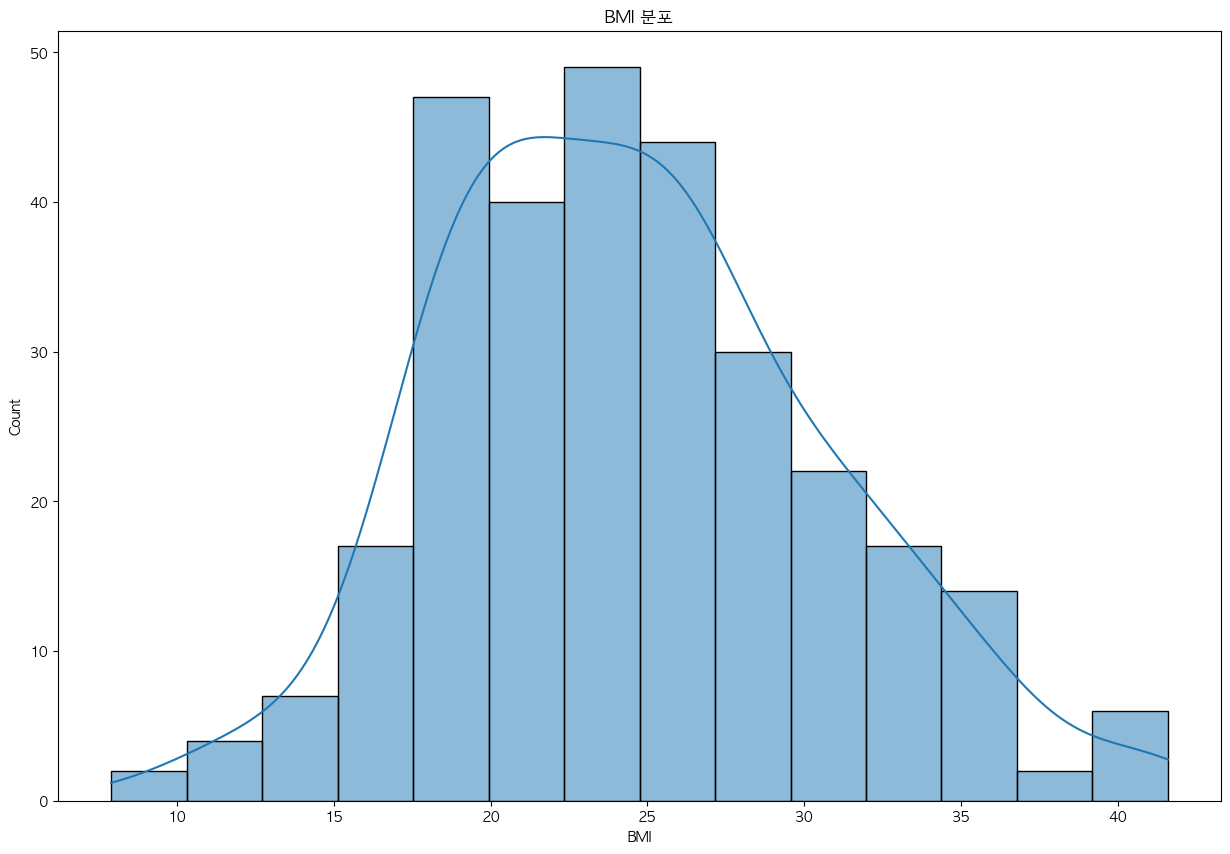

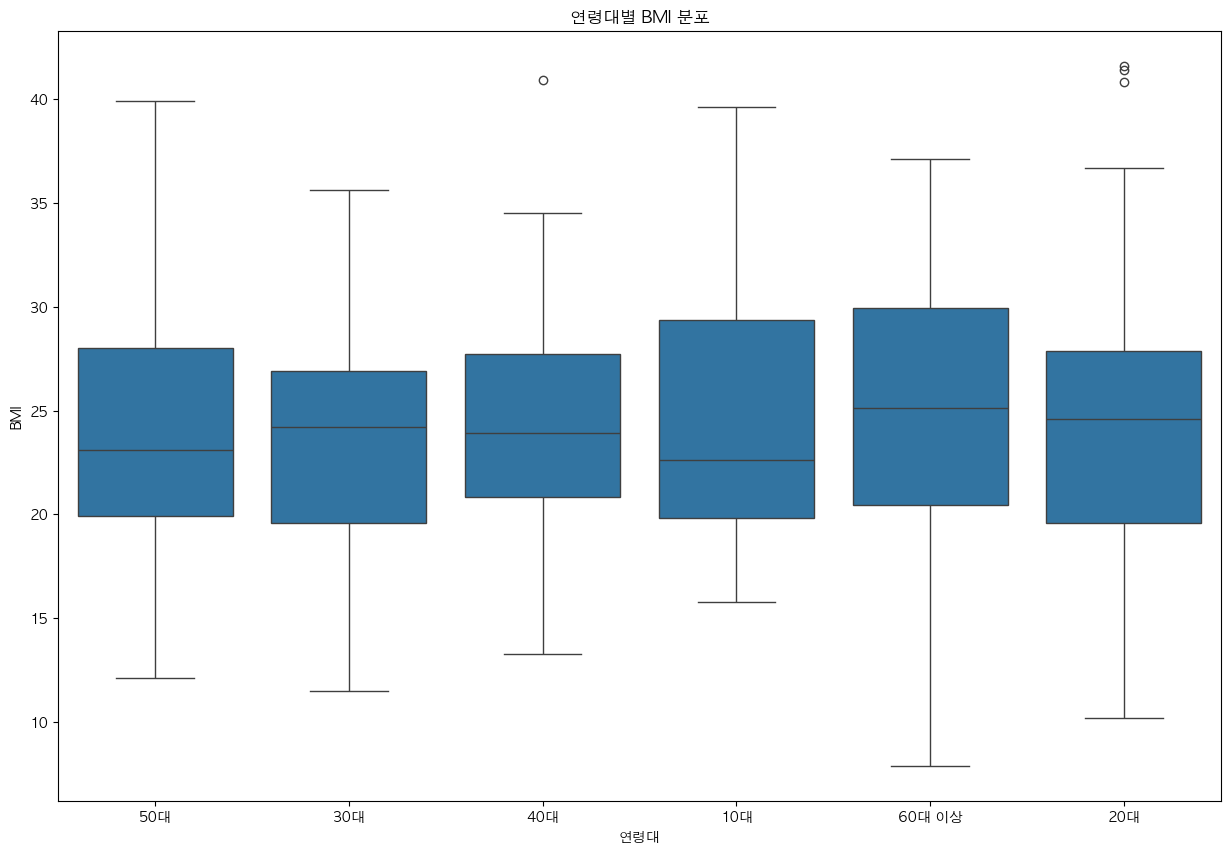

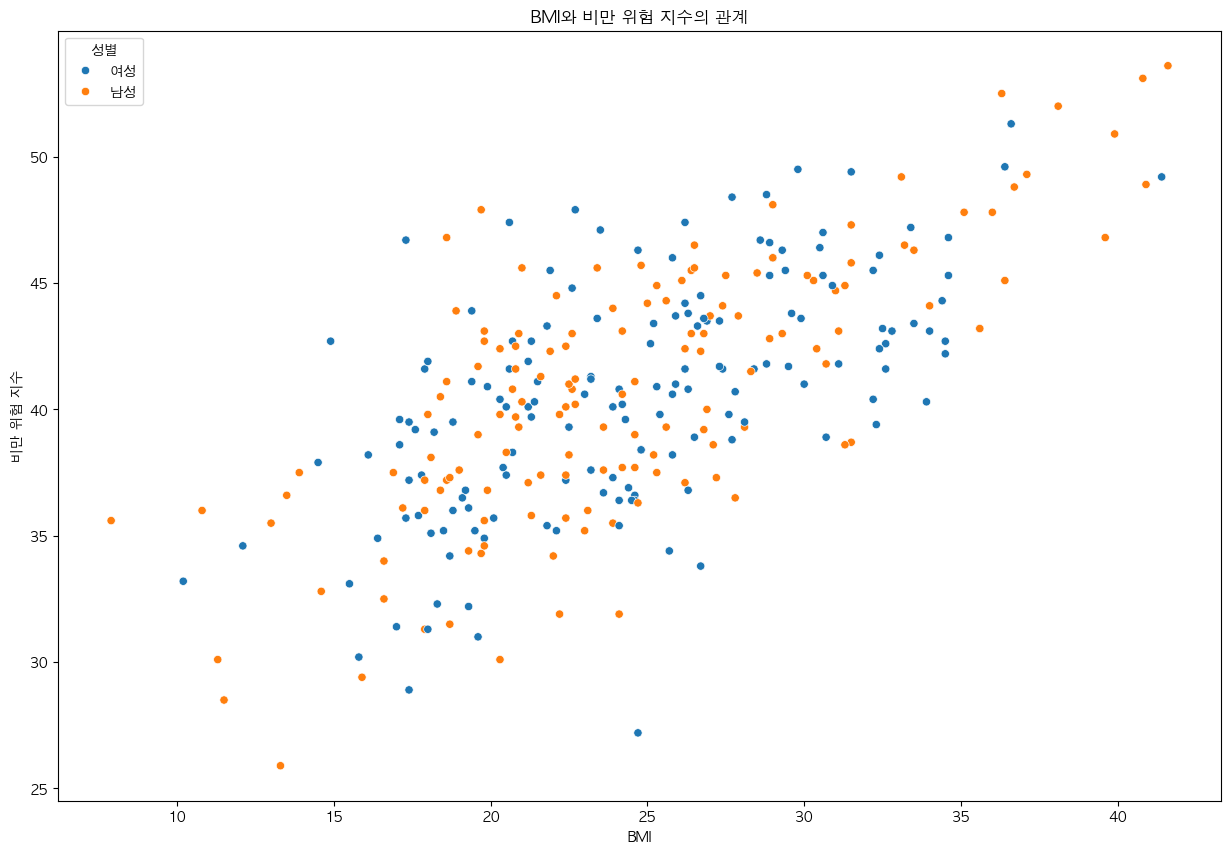

In [662]:
# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.histplot(data=df, x='BMI', kde=True)
plt.title('BMI Î∂ÑÌè¨')
plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x='Ïó∞Î†πÎåÄ', y='BMI')
plt.title('Ïó∞Î†πÎåÄÎ≥Ñ BMI Î∂ÑÌè¨')
plt.show()

plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x='BMI', y='ÎπÑÎßå ÏúÑÌóò ÏßÄÏàò', hue='ÏÑ±Î≥Ñ')
plt.title('BMIÏôÄ ÎπÑÎßå ÏúÑÌóò ÏßÄÏàòÏùò Í¥ÄÍ≥Ñ')
plt.show()


In [663]:
df.to_csv("predictions.csv", index=False)

In [664]:
def calculate_age_group(age):
    """
    ÎÇòÏù¥Î•º 10Îã®ÏúÑ Ïó∞Î†πÎåÄÎ°ú Î≥ÄÌôòÌïòÎäî Ìï®Ïàò
    """
    if age < 10:
        return "0-9ÏÑ∏"
    elif age < 20:
        return "10ÎåÄ"
    elif age < 30:
        return "20ÎåÄ"
    elif age < 40:
        return "30ÎåÄ"
    elif age < 50:
        return "40ÎåÄ"
    elif age < 60:
        return "50ÎåÄ"
    else:
        return "60ÎåÄ Ïù¥ÏÉÅ"



In [665]:
# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ïó∞Î†πÎåÄ Ïó¥ Ï∂îÍ∞Ä
df['Ïó∞Î†πÎåÄ'] = df['ÎÇòÏù¥'].apply(calculate_age_group)

In [666]:
# Í≤∞Í≥º ÌôïÏù∏
print(df[['ÎÇòÏù¥', 'Ïó∞Î†πÎåÄ']].head(20))

    ÎÇòÏù¥     Ïó∞Î†πÎåÄ
0   74  60ÎåÄ Ïù¥ÏÉÅ
1   23     20ÎåÄ
2   42     40ÎåÄ
3   51     50ÎåÄ
4   76  60ÎåÄ Ïù¥ÏÉÅ
5   12     10ÎåÄ
6   49     40ÎåÄ
7   40     40ÎåÄ
8   42     40ÎåÄ
9   56     50ÎåÄ
10  69  60ÎåÄ Ïù¥ÏÉÅ
11  29     20ÎåÄ
12  57     50ÎåÄ
13  69  60ÎåÄ Ïù¥ÏÉÅ
14  78  60ÎåÄ Ïù¥ÏÉÅ
15  35     30ÎåÄ
16  38     30ÎåÄ
17  19     10ÎåÄ
18  77  60ÎåÄ Ïù¥ÏÉÅ
19  55     50ÎåÄ


In [667]:
df.columns

Index(['user_id', 'ÏÑ±Î≥Ñ', 'Ïó∞Î†πÎåÄ', 'ÎÇòÏù¥', 'ÌÇ§', 'ÌòÑÏû¨ Ï≤¥Ï§ë', 'Î™©Ìëú Ï≤¥Ï§ë', 'ÌóàÎ¶¨ÎëòÎ†à', 'Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§',
       'HDLÏΩúÎ†àÏä§ÌÖåÎ°§', 'LDLÏΩúÎ†àÏä§ÌÖåÎ°§', 'Ìä∏Î¶¨Í∏ÄÎ¶¨ÏÑ∏ÎùºÏù¥Îìú', 'ÏãùÏ†ÑÌòàÎãπ(Í≥µÎ≥µÌòàÎãπ)', 'ÌôúÎèô ÏàòÏ§Ä', 'Ìù°Ïó∞ÏÉÅÌÉú',
       'ÏùåÏ£ºÏó¨Î∂Ä', 'ÏòàÏ∏° ÎÇ†Ïßú', 'BMI', 'ÏàòÏ∂ïÍ∏∞ÌòàÏïï(ÏµúÍ≥† ÌòàÏïï)', 'Ïù¥ÏôÑÍ∏∞ÌòàÏïï(ÏµúÏ†Ä ÌòàÏïï)', 'ÌòàÏïï Ï∞®Ïù¥',
       'Í≥†ÌòàÏïï ÏúÑÌóò', 'Í≥†ÌòàÎãπ ÏúÑÌóò', 'Í∞Ñ ÏßÄÌëú', 'ÎπÑÎßå ÏúÑÌóò ÏßÄÏàò', 'Ïö¥Îèô Í∞úÏÑ† ÌïÑÏöîÏÑ±', 'Ïö¥Îèô Ï†êÏàò',
       'ÏãùÎã® Í∞úÏÑ† ÌïÑÏöîÏÑ±', 'ÏãùÎã® Ï†êÏàò'],
      dtype='object')

In [668]:
df.to_csv("predictions.csv", index=False)

In [669]:
df.columns

Index(['user_id', 'ÏÑ±Î≥Ñ', 'Ïó∞Î†πÎåÄ', 'ÎÇòÏù¥', 'ÌÇ§', 'ÌòÑÏû¨ Ï≤¥Ï§ë', 'Î™©Ìëú Ï≤¥Ï§ë', 'ÌóàÎ¶¨ÎëòÎ†à', 'Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§',
       'HDLÏΩúÎ†àÏä§ÌÖåÎ°§', 'LDLÏΩúÎ†àÏä§ÌÖåÎ°§', 'Ìä∏Î¶¨Í∏ÄÎ¶¨ÏÑ∏ÎùºÏù¥Îìú', 'ÏãùÏ†ÑÌòàÎãπ(Í≥µÎ≥µÌòàÎãπ)', 'ÌôúÎèô ÏàòÏ§Ä', 'Ìù°Ïó∞ÏÉÅÌÉú',
       'ÏùåÏ£ºÏó¨Î∂Ä', 'ÏòàÏ∏° ÎÇ†Ïßú', 'BMI', 'ÏàòÏ∂ïÍ∏∞ÌòàÏïï(ÏµúÍ≥† ÌòàÏïï)', 'Ïù¥ÏôÑÍ∏∞ÌòàÏïï(ÏµúÏ†Ä ÌòàÏïï)', 'ÌòàÏïï Ï∞®Ïù¥',
       'Í≥†ÌòàÏïï ÏúÑÌóò', 'Í≥†ÌòàÎãπ ÏúÑÌóò', 'Í∞Ñ ÏßÄÌëú', 'ÎπÑÎßå ÏúÑÌóò ÏßÄÏàò', 'Ïö¥Îèô Í∞úÏÑ† ÌïÑÏöîÏÑ±', 'Ïö¥Îèô Ï†êÏàò',
       'ÏãùÎã® Í∞úÏÑ† ÌïÑÏöîÏÑ±', 'ÏãùÎã® Ï†êÏàò'],
      dtype='object')

In [636]:
df['ÏòàÏ∏° ÎÇ†Ïßú']

0     2024-12-09 07:05:46.881297
1     2024-11-25 07:05:46.881297
2     2024-10-31 07:05:46.881297
3     2024-11-22 07:05:46.881297
4     2024-08-04 07:05:46.881297
                 ...            
296   2024-11-08 07:05:46.881297
297   2024-04-12 07:05:46.881297
298   2025-02-18 07:05:46.881297
299   2024-12-20 07:05:46.881297
300   2024-11-04 07:05:46.881297
Name: ÏòàÏ∏° ÎÇ†Ïßú, Length: 301, dtype: datetime64[ns]

In [637]:
df['ÏòàÏ∏° ÎÇ†Ïßú'] = pd.to_datetime(df['ÏòàÏ∏° ÎÇ†Ïßú'])

In [638]:
df

user_id  ÏÑ±Î≥Ñ     Ïó∞Î†πÎåÄ  ÎÇòÏù¥      ÌÇ§  ÌòÑÏû¨ Ï≤¥Ï§ë  Î™©Ìëú Ï≤¥Ï§ë  ÌóàÎ¶¨ÎëòÎ†à  Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§  HDLÏΩúÎ†àÏä§ÌÖåÎ°§  \
0      user_0  ÎÇ®ÏÑ±  60ÎåÄ Ïù¥ÏÉÅ  73  166.7   78.1   50.5  89.6     277        57   
1      user_1  ÎÇ®ÏÑ±  60ÎåÄ Ïù¥ÏÉÅ  75  167.8   90.6   75.1  99.0     160        58   
2      user_2  Ïó¨ÏÑ±     20ÎåÄ  29  163.6   55.4   77.8  91.5     237        12   
3      user_3  Ïó¨ÏÑ±     50ÎåÄ  53  159.8   84.9   67.1  92.3     243        37   
4      user_4  ÎÇ®ÏÑ±     50ÎåÄ  56  158.6   82.5   68.5  79.3     230        58   
..        ...  ..     ...  ..    ...    ...    ...   ...     ...       ...   
296  user_296  Ïó¨ÏÑ±     30ÎåÄ  38  180.9   53.7   57.8  81.7     142        54   
297  user_297  Ïó¨ÏÑ±  60ÎåÄ Ïù¥ÏÉÅ  73  173.8   75.0   55.0  74.3     163        54   
298  user_298  Ïó¨ÏÑ±     50ÎåÄ  55  165.1   96.5   55.8  82.3     133        62   
299  user_299  ÎÇ®ÏÑ±     40ÎåÄ  45  161.7   70.5   62.5  76.1     230        77   
300  user_300  Ïó¨ÏÑ±     10ÎåÄ  16  155.3   72.2   59.0  86.6     146        43   

     ...  Ïù¥ÏôÑÍ∏∞ÌòàÏïï(ÏµúÏ†Ä ÌòàÏïï)  ÌòàÏïï Ï∞®Ïù¥  Í≥†ÌòàÏïï ÏúÑÌóò Í≥†ÌòàÎãπ ÏúÑÌóò Í∞Ñ ÏßÄÌëú ÎπÑÎßå ÏúÑÌóò ÏßÄÏàò Ïö¥Îèô Í∞úÏÑ† ÌïÑÏöîÏÑ±  Ïö¥Îèô Ï†êÏàò  \
0    ...            90     70     Í≥†ÏúÑÌóò     ÎÜíÏùå   Í≤ΩÍ≥Ñ     43.0        49     61   
1    ...            90     76     Í≥†ÏúÑÌóò     ÎÜíÏùå   ÏúÑÌóò     47.2        46     27   
2    ...            90     43      Ï£ºÏùò     Î≥¥ÌÜµ   Ï†ïÏÉÅ     42.4        75     34   
3    ...            90     63     Í≥†ÏúÑÌóò     ÎÜíÏùå   ÏúÑÌóò     46.3        56     51   
4    ...            90     61     Í≥†ÏúÑÌóò     ÎÜíÏùå   ÏúÑÌóò     44.2        55     35   
..   ...           ...    ...     ...    ...  ...      ...       ...    ...   
296  ...            87     43      Ï£ºÏùò     Î≥¥ÌÜµ   Ï†ïÏÉÅ     35.7        72     95   
297  ...            90     71     Í≥†ÏúÑÌóò     ÎÜíÏùå   Í≤ΩÍ≥Ñ     37.9        51     29   
298  ...            90     70     Í≥†ÏúÑÌóò     ÎÜíÏùå   ÏúÑÌóò     44.7        54     96   
299  ...            90     56     Í≥†ÏúÑÌóò     ÎÜíÏùå   Í≤ΩÍ≥Ñ     41.2        64     44   
300  ...            90     43      Ï£ºÏùò     Î≥¥ÌÜµ   ÏúÑÌóò     42.7        77     58   

     ÏãùÎã® Í∞úÏÑ† ÌïÑÏöîÏÑ±  ÏãùÎã® Ï†êÏàò  
0           55     46  
1           43     68  
2           52     47  
3           55     43  
4           56     49  
..         ...    ...  
296         40     45  
297         49     60  
298         45     63  
299         65     16  
300         44     52  

[301 rows x 29 columns]

In [639]:
df.columns

Index(['user_id', 'ÏÑ±Î≥Ñ', 'Ïó∞Î†πÎåÄ', 'ÎÇòÏù¥', 'ÌÇ§', 'ÌòÑÏû¨ Ï≤¥Ï§ë', 'Î™©Ìëú Ï≤¥Ï§ë', 'ÌóàÎ¶¨ÎëòÎ†à', 'Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§',
       'HDLÏΩúÎ†àÏä§ÌÖåÎ°§', 'LDLÏΩúÎ†àÏä§ÌÖåÎ°§', 'Ìä∏Î¶¨Í∏ÄÎ¶¨ÏÑ∏ÎùºÏù¥Îìú', 'ÏãùÏ†ÑÌòàÎãπ(Í≥µÎ≥µÌòàÎãπ)', 'ÌôúÎèô ÏàòÏ§Ä', 'Ìù°Ïó∞ÏÉÅÌÉú',
       'ÏùåÏ£ºÏó¨Î∂Ä', 'ÏòàÏ∏° ÎÇ†Ïßú', 'BMI', 'ÏàòÏ∂ïÍ∏∞ÌòàÏïï(ÏµúÍ≥† ÌòàÏïï)', 'Ïù¥ÏôÑÍ∏∞ÌòàÏïï(ÏµúÏ†Ä ÌòàÏïï)', 'ÌòàÏïï Ï∞®Ïù¥',
       'Í≥†ÌòàÏïï ÏúÑÌóò', 'Í≥†ÌòàÎãπ ÏúÑÌóò', 'Í∞Ñ ÏßÄÌëú', 'ÎπÑÎßå ÏúÑÌóò ÏßÄÏàò', 'Ïö¥Îèô Í∞úÏÑ† ÌïÑÏöîÏÑ±', 'Ïö¥Îèô Ï†êÏàò',
       'ÏãùÎã® Í∞úÏÑ† ÌïÑÏöîÏÑ±', 'ÏãùÎã® Ï†êÏàò'],
      dtype='object')

In [640]:
df["ÌôúÎèô ÏàòÏ§Ä"]

0      Ï§ëÍ∞ÑÌôúÎèô
1       Ï†ÄÌôúÎèô
2       Ï†ÄÌôúÎèô
3      Ï§ëÍ∞ÑÌôúÎèô
4       Ï†ÄÌôúÎèô
       ... 
296     Í≥†ÌôúÎèô
297     Ï†ÄÌôúÎèô
298     Í≥†ÌôúÎèô
299     Ï†ÄÌôúÎèô
300    Ï§ëÍ∞ÑÌôúÎèô
Name: ÌôúÎèô ÏàòÏ§Ä, Length: 301, dtype: object

In [67]:

# Í≤∞Ï∏°Ïπò ÌòÑÌô© ÌôïÏù∏
print("Í≤∞Ï∏°Ïπò ÌòÑÌô©:")
print(df.isnull().sum())
print("\nÍ≤∞Ï∏°Ïπò ÎπÑÏú®:")
print(df.isnull().sum() / len(df) * 100)

Í≤∞Ï∏°Ïπò ÌòÑÌô©:
user_id        90
ÏÑ±Î≥Ñ             12
Ïó∞Î†πÎåÄ            24
ÎÇòÏù¥            329
ÌÇ§             392
ÌòÑÏû¨ Ï≤¥Ï§ë          81
Î™©Ìëú Ï≤¥Ï§ë          82
BMI            79
ÌóàÎ¶¨ÎëòÎ†à          177
ÏàòÏ∂ïÍ∏∞ÌòàÏïï         168
Ïù¥ÏôÑÍ∏∞ÌòàÏïï         168
ÌòàÏïï Ï∞®Ïù¥         242
ÏΩúÎ†àÏä§ÌÖåÎ°§         168
HDLÏΩúÎ†àÏä§ÌÖåÎ°§      204
LDLÏΩúÎ†àÏä§ÌÖåÎ°§      204
Ìä∏Î¶¨Í∏ÄÎ¶¨ÏÑ∏ÎùºÏù¥Îìú      204
ÏãùÏ†ÑÌòàÎãπ(Í≥µÎ≥µÌòàÎãπ)    296
ÌôúÎèô ÏàòÏ§Ä         210
Ìù°Ïó∞ÏÉÅÌÉú          204
ÏùåÏ£ºÏó¨Î∂Ä          204
Ïö¥Îèô Í∞ÄÎä•ÏÑ±        252
Ïö¥Îèô Ï†êÏàò           1
ÏãùÎã® Í∞úÏÑ† ÌïÑÏöîÏÑ±     252
ÏãùÎã® Ï†êÏàò           1
ÏòàÏ∏° ÎÇ†Ïßú          88
dtype: int64

Í≤∞Ï∏°Ïπò ÎπÑÏú®:
user_id       21.634615
ÏÑ±Î≥Ñ             2.884615
Ïó∞Î†πÎåÄ            5.769231
ÎÇòÏù¥            79.086538
ÌÇ§             94.230769
ÌòÑÏû¨ Ï≤¥Ï§ë         19.471154
Î™©Ìëú Ï≤¥Ï§ë         19.711538
BMI           18.990385
ÌóàÎ¶¨ÎëòÎ†à          42.548077
ÏàòÏ∂ïÍ∏∞ÌòàÏïï         40.384615
Ïù¥ÏôÑÍ∏

In [69]:

def handle_missing_values(df):
    # 1. ÏÇ¨Ïö©Ïûê ID Ï≤òÎ¶¨
    if df['user_id'].isnull().sum() > 0:
        print("Í≤ΩÍ≥†: user_idÏóê Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÏäµÎãàÎã§. Ïù¥Î•º Í≥†Ïú†Ìïú Í∞íÏúºÎ°ú ÎåÄÏ≤¥Ìï©ÎãàÎã§.")
        df['user_id'] = df['user_id'].fillna(pd.Series([f'generated_id_{i}' for i in range(df['user_id'].isnull().sum())]))

    # 2. Î≤îÏ£ºÌòï Î≥ÄÏàò: ÏµúÎπàÍ∞íÏúºÎ°ú ÎåÄÏ≤¥
    for col in ['ÏÑ±Î≥Ñ', 'Ïó∞Î†πÎåÄ', 'ÌôúÎèô ÏàòÏ§Ä', 'Ìù°Ïó∞ÏÉÅÌÉú', 'ÏùåÏ£ºÏó¨Î∂Ä']:
        df[col] = df[col].fillna(df[col].mode()[0])

    # 3. ÏàòÏπòÌòï Î≥ÄÏàò: Ï§ëÏïôÍ∞íÏúºÎ°ú ÎåÄÏ≤¥
    numeric_cols = ['ÎÇòÏù¥', 'ÌÇ§', 'ÌòÑÏû¨ Ï≤¥Ï§ë', 'Î™©Ìëú Ï≤¥Ï§ë', 'BMI', 'ÌóàÎ¶¨ÎëòÎ†à', 
                    'ÏàòÏ∂ïÍ∏∞ÌòàÏïï', 'Ïù¥ÏôÑÍ∏∞ÌòàÏïï', 'ÌòàÏïï Ï∞®Ïù¥', 'ÏΩúÎ†àÏä§ÌÖåÎ°§', 
                    'HDLÏΩúÎ†àÏä§ÌÖåÎ°§', 'LDLÏΩúÎ†àÏä§ÌÖåÎ°§', 'Ìä∏Î¶¨Í∏ÄÎ¶¨ÏÑ∏ÎùºÏù¥Îìú', 'ÏãùÏ†ÑÌòàÎãπ(Í≥µÎ≥µÌòàÎãπ)']
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = df[col].fillna(df[col].median())

    # 4. Í≥ÑÏÇ∞ Í∞ÄÎä•Ìïú Î≥ÄÏàò
    df['BMI'] = df['BMI'].fillna(df['ÌòÑÏû¨ Ï≤¥Ï§ë'] / ((df['ÌÇ§']/100) ** 2))
    df['ÌòàÏïï Ï∞®Ïù¥'] = df['ÌòàÏïï Ï∞®Ïù¥'].fillna(df['ÏàòÏ∂ïÍ∏∞ÌòàÏïï'] - df['Ïù¥ÏôÑÍ∏∞ÌòàÏïï'])

    # 5. ÏòàÏ∏° Í¥ÄÎ†® Î≥ÄÏàò: 40~100 ÏÇ¨Ïù¥Ïùò ÎûúÎç§Í∞íÏúºÎ°ú ÎåÄÏ≤¥
    prediction_cols = ['Ïö¥Îèô Í∞ÄÎä•ÏÑ±', 'Ïö¥Îèô Ï†êÏàò', 'ÏãùÎã® Í∞úÏÑ† ÌïÑÏöîÏÑ±', 'ÏãùÎã® Ï†êÏàò']
    for col in prediction_cols:
        null_mask = df[col].isnull()
        df.loc[null_mask, col] = np.random.randint(40, 101, size=null_mask.sum())

    # 6. ÎÇ†Ïßú Î≥ÄÏàò
    df['ÏòàÏ∏° ÎÇ†Ïßú'] = df['ÏòàÏ∏° ÎÇ†Ïßú'].fillna(df['ÏòàÏ∏° ÎÇ†Ïßú'].mode()[0])

    return df

# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Ï†ÅÏö©
df = handle_missing_values(df)

# Ï≤òÎ¶¨ ÌõÑ Í≤∞Ï∏°Ïπò ÌòÑÌô© Ïû¨ÌôïÏù∏
print("\nÍ≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÌõÑ ÌòÑÌô©:")
print(df.isnull().sum())



Í≤ΩÍ≥†: user_idÏóê Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÏäµÎãàÎã§. Ïù¥Î•º Í≥†Ïú†Ìïú Í∞íÏúºÎ°ú ÎåÄÏ≤¥Ìï©ÎãàÎã§.

Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÌõÑ ÌòÑÌô©:
user_id       4
ÏÑ±Î≥Ñ            0
Ïó∞Î†πÎåÄ           0
ÎÇòÏù¥            0
ÌÇ§             0
ÌòÑÏû¨ Ï≤¥Ï§ë         0
Î™©Ìëú Ï≤¥Ï§ë         0
BMI           0
ÌóàÎ¶¨ÎëòÎ†à          0
ÏàòÏ∂ïÍ∏∞ÌòàÏïï         0
Ïù¥ÏôÑÍ∏∞ÌòàÏïï         0
ÌòàÏïï Ï∞®Ïù¥         0
ÏΩúÎ†àÏä§ÌÖåÎ°§         0
HDLÏΩúÎ†àÏä§ÌÖåÎ°§      0
LDLÏΩúÎ†àÏä§ÌÖåÎ°§      0
Ìä∏Î¶¨Í∏ÄÎ¶¨ÏÑ∏ÎùºÏù¥Îìú      0
ÏãùÏ†ÑÌòàÎãπ(Í≥µÎ≥µÌòàÎãπ)    0
ÌôúÎèô ÏàòÏ§Ä         0
Ìù°Ïó∞ÏÉÅÌÉú          0
ÏùåÏ£ºÏó¨Î∂Ä          0
Ïö¥Îèô Í∞ÄÎä•ÏÑ±        0
Ïö¥Îèô Ï†êÏàò         0
ÏãùÎã® Í∞úÏÑ† ÌïÑÏöîÏÑ±     0
ÏãùÎã® Ï†êÏàò         0
ÏòàÏ∏° ÎÇ†Ïßú         0
dtype: int64


In [70]:
df.head()

user_id  ÏÑ±Î≥Ñ  Ïó∞Î†πÎåÄ    ÎÇòÏù¥      ÌÇ§  ÌòÑÏû¨ Ï≤¥Ï§ë  Î™©Ìëú Ï≤¥Ï§ë    BMI  ÌóàÎ¶¨ÎëòÎ†à  ÏàòÏ∂ïÍ∏∞ÌòàÏïï  \
0             Í≤åÏä§Ìä∏  ÎÇ®ÏÑ±  5.0  25.0  170.0   70.0   65.0  24.22  80.0  120.0   
1  generated_id_1  ÎÇ®ÏÑ±  5.0  25.0  170.0   70.0   65.0  24.22  80.0  120.0   
2  generated_id_2  ÎÇ®ÏÑ±  5.0  25.0  170.0   70.0   65.0  24.22  80.0  120.0   
3  generated_id_3  ÎÇ®ÏÑ±  5.0  25.0  170.0   70.0   65.0  24.22  80.0  120.0   
4  generated_id_4  ÎÇ®ÏÑ±  5.0  25.0  170.0   70.0   65.0  24.22  80.0  120.0   

   ...  Ìä∏Î¶¨Í∏ÄÎ¶¨ÏÑ∏ÎùºÏù¥Îìú  ÏãùÏ†ÑÌòàÎãπ(Í≥µÎ≥µÌòàÎãπ)  ÌôúÎèô ÏàòÏ§Ä  Ìù°Ïó∞ÏÉÅÌÉú  ÏùåÏ£ºÏó¨Î∂Ä       Ïö¥Îèô Í∞ÄÎä•ÏÑ±  \
0  ...     150.0        90.0   Ï§ëÍ∞ÑÌôúÎèô   ÎπÑÌù°Ïó∞   ÎπÑÏùåÏ£º  üîç ÏòàÏ∏°ÏùÑ Ïã§ÌñâÌïòÏÑ∏Ïöî   
1  ...     150.0        90.0    Ï†ÄÌôúÎèô   ÎπÑÌù°Ïó∞   ÎπÑÏùåÏ£º  üîç ÏòàÏ∏°ÏùÑ Ïã§ÌñâÌïòÏÑ∏Ïöî   
2  ...     150.0        90.0    Ï†ÄÌôúÎèô   ÎπÑÌù°Ïó∞   ÎπÑÏùåÏ£º  üîç ÏòàÏ∏°ÏùÑ Ïã§ÌñâÌïòÏÑ∏Ïöî   
3  ...     150.0        90.0    Ï†ÄÌôúÎèô   ÎπÑÌù°Ïó∞   ÎπÑÏùåÏ£º  üîç ÏòàÏ∏°ÏùÑ Ïã§ÌñâÌïòÏÑ∏Ïöî   
4  ...     150.0        90.0    Ï†ÄÌôúÎèô   ÎπÑÌù°Ïó∞   ÎπÑÏùåÏ£º  üîç ÏòàÏ∏°ÏùÑ Ïã§ÌñâÌïòÏÑ∏Ïöî   

                      Ïö¥Îèô Ï†êÏàò    ÏãùÎã® Í∞úÏÑ† ÌïÑÏöîÏÑ±                     ÏãùÎã® Ï†êÏàò  \
0  ('üö® Î™®Îç∏Ïù¥ Î°úÎìúÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§!', 0)  üîç ÏòàÏ∏°ÏùÑ Ïã§ÌñâÌïòÏÑ∏Ïöî  ('üö® Î™®Îç∏Ïù¥ Î°úÎìúÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§!', 0)   
1                     0.00%  üîç ÏòàÏ∏°ÏùÑ Ïã§ÌñâÌïòÏÑ∏Ïöî                     0.00%   
2                     0.00%  üîç ÏòàÏ∏°ÏùÑ Ïã§ÌñâÌïòÏÑ∏Ïöî                     0.00%   
3                     0.00%  üîç ÏòàÏ∏°ÏùÑ Ïã§ÌñâÌïòÏÑ∏Ïöî                     0.00%   
4                     0.00%  üîç ÏòàÏ∏°ÏùÑ Ïã§ÌñâÌïòÏÑ∏Ïöî                     0.00%   

                 ÏòàÏ∏° ÎÇ†Ïßú  
0  2025-02-20 02:42:09  
1  2025-02-17 18:59:36  
2  2025-02-17 18:59:36  
3  2025-02-17 18:59:36  
4  2025-02-17 18:59:36  

[5 rows x 25 columns]

In [71]:
df.to_csv("predictions.csv", index=False)

In [ ]:

# ‚úÖ ÎèôÏùºÌïú ÏùòÎØ∏Ïùò Ï§ëÎ≥µ Ïª¨Îüº Î¶¨Ïä§Ìä∏
duplicate_columns = {
"ÌòÑÏû¨ Ï≤¥Ï§ë": ["ÌòÑÏû¨ Ï≤¥Ï§ë", "ÌòÑÏû¨ Ï≤¥Ï§ë (kg)", "weight"],
"Î™©Ìëú Ï≤¥Ï§ë": ["Î™©Ìëú Ï≤¥Ï§ë", "Î™©Ìëú Ï≤¥Ï§ë (kg)", "Î™©ÌëúÏ≤¥Ï§ë (kg)", "goal_weight"],
"Ïó∞Î†πÎåÄ": ["Ïó∞Î†πÎåÄ", "Ïó∞Î†πÎåÄÏΩîÎìú(5ÏÑ∏Îã®ÏúÑ)", "age_group"],
"ÌÇ§": ['ÌÇ§ (cm)', "height","ÌÇ§"],
"ÎÇòÏù¥": ["ÎÇòÏù¥", "age"],
"ÌóàÎ¶¨ÎëòÎ†à": ["ÌóàÎ¶¨ÎëòÎ†à (cm)", "waist","ÌóàÎ¶¨ÎëòÎ†à"],
"ÏàòÏ∂ïÍ∏∞ÌòàÏïï(ÏµúÍ≥† ÌòàÏïï)": ["ÏàòÏ∂ïÍ∏∞ÌòàÏïï(ÏµúÍ≥† ÌòàÏïï)", "systolic_bp"],
"Ïù¥ÏôÑÍ∏∞ÌòàÏïï(ÏµúÏ†Ä ÌòàÏïï)": ["Ïù¥ÏôÑÍ∏∞ÌòàÏïï(ÏµúÏ†Ä ÌòàÏïï)", "diastolic_bp"],
"ÏΩúÎ†àÏä§ÌÖåÎ°§": ["ÏΩúÎ†àÏä§ÌÖåÎ°§ ÏßÄÏàò", "cholesterol","ÏΩúÎ†àÏä§ÌÖåÎ°§"],
"ÌôúÎèô ÏàòÏ§Ä": [ 'ÌôúÎèô ÏàòÏ§Ä',"activity_level"],
}

In [ ]:
# ‚úÖ Ï§ëÎ≥µÎêú Ïª¨Îüº ÏÇ≠Ï†ú
df.drop(columns=[
    "prediction_exercise", "prediction_food", "timestamp", "gender"
], inplace=True)

In [49]:
import os

df.to_csv("predictions.csv", index=False)

In [5]:
df.columns

Index(['user_id', 'ÏÑ±Î≥Ñ', 'Ïó∞Î†πÎåÄ', 'BMI', 'ÌòÑÏû¨ Ï≤¥Ï§ë', 'Î™©Ìëú Ï≤¥Ï§ë', 'Ïö¥Îèô Í∞ÄÎä•ÏÑ±', 'Ïö¥Îèô Ï†êÏàò',
       'ÏãùÎã® Í∞úÏÑ† ÌïÑÏöîÏÑ±', 'ÏãùÎã® ÌôïÎ•†', 'ÎÇòÏù¥', 'ÏòàÏ∏° ÎÇ†Ïßú', 'ÌóàÎ¶¨ÎëòÎ†à (cm)', 'ÌÇ§ (cm)',
       'ÏàòÏ∂ïÍ∏∞ÌòàÏïï(ÏµúÍ≥† ÌòàÏïï)', 'Ïù¥ÏôÑÍ∏∞ÌòàÏïï(ÏµúÏ†Ä ÌòàÏïï)', 'ÏΩúÎ†àÏä§ÌÖåÎ°§ ÏßÄÏàò', 'ÌôúÎèô ÏàòÏ§Ä', 'gender', 'age',
       'height', 'weight', 'goal_weight', 'waist', 'systolic_bp',
       'diastolic_bp', 'cholesterol', 'activity_level', 'activity_level_code',
       'ÌóàÎ¶¨ÎëòÎ†à (cm).1', 'HDLÏΩúÎ†àÏä§ÌÖåÎ°§', 'LDLÏΩúÎ†àÏä§ÌÖåÎ°§', 'Ìä∏Î¶¨Í∏ÄÎ¶¨ÏÑ∏ÎùºÏù¥Îìú', 'Ìù°Ïó∞ÏÉÅÌÉú', 'ÏùåÏ£ºÏó¨Î∂Ä',
       'ÌòàÏïï Ï∞®Ïù¥', 'Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§', 'Í≥†ÌòàÎãπ ÏúÑÌóò', 'Í∞Ñ ÏßÄÌëú', 'ÎπÑÎßå ÏúÑÌóò ÏßÄÏàò', 'ÏãùÏ†ÑÌòàÎãπ(Í≥µÎ≥µÌòàÎãπ)', 'ÌóàÎ¶¨ÎëòÎ†à',
       'Ïö¥Îèô ÌôïÎ•†', 'ÏãùÎã® Ï†êÏàò'],
      dtype='object')

In [59]:
# ‚úÖ ÎèôÏùºÌïú ÏùòÎØ∏Ïùò Ï§ëÎ≥µ Ïª¨Îüº Î¶¨Ïä§Ìä∏
duplicate_columns = {
    "ÌòÑÏû¨ Ï≤¥Ï§ë": ["ÌòÑÏû¨ Ï≤¥Ï§ë", "ÌòÑÏû¨ Ï≤¥Ï§ë (kg)", "weight"],
    "Î™©Ìëú Ï≤¥Ï§ë": ["Î™©Ìëú Ï≤¥Ï§ë", "Î™©Ìëú Ï≤¥Ï§ë (kg)", "Î™©ÌëúÏ≤¥Ï§ë (kg)", "goal_weight"],
    "Ïó∞Î†πÎåÄ": ["Ïó∞Î†πÎåÄ", "Ïó∞Î†πÎåÄÏΩîÎìú(5ÏÑ∏Îã®ÏúÑ)", "age_group"],
    "ÌÇ§": ['ÌÇ§ (cm)', "height","ÌÇ§"],
    "ÎÇòÏù¥": ["ÎÇòÏù¥", "age"],
    "ÌóàÎ¶¨ÎëòÎ†à": ["ÌóàÎ¶¨ÎëòÎ†à (cm)", "waist","ÌóàÎ¶¨ÎëòÎ†à"],
    "ÏàòÏ∂ïÍ∏∞ÌòàÏïï(ÏµúÍ≥† ÌòàÏïï)": ["ÏàòÏ∂ïÍ∏∞ÌòàÏïï(ÏµúÍ≥† ÌòàÏïï)", "systolic_bp"],
    "Ïù¥ÏôÑÍ∏∞ÌòàÏïï(ÏµúÏ†Ä ÌòàÏïï)": ["Ïù¥ÏôÑÍ∏∞ÌòàÏïï(ÏµúÏ†Ä ÌòàÏïï)", "diastolic_bp"],
    "ÏΩúÎ†àÏä§ÌÖåÎ°§": ["ÏΩúÎ†àÏä§ÌÖåÎ°§ ÏßÄÏàò", "cholesterol","ÏΩúÎ†àÏä§ÌÖåÎ°§"],
    "ÌôúÎèô ÏàòÏ§Ä": [ 'ÌôúÎèô ÏàòÏ§Ä',"activity_level"],
}

In [62]:
df.columns

Index(['user_id', 'Ïù¥Î¶Ñ', 'ÏÑ±Î≥Ñ', 'Ïó∞Î†πÎåÄ', 'BMI', 'ÌòÑÏû¨ Ï≤¥Ï§ë', 'Î™©Ìëú Ï≤¥Ï§ë', 'Ïö¥Îèô Í∞ÄÎä•ÏÑ±',
       'Ïö¥Îèô ÌôïÎ•†', 'ÏãùÎã® Í∞úÏÑ† ÌïÑÏöîÏÑ±', 'ÏãùÎã® ÌôïÎ•†', 'ÎÇòÏù¥', 'ÏòàÏ∏° ÎÇ†Ïßú', 'ÌóàÎ¶¨ÎëòÎ†à (cm)', 'ID',
       'ÌÇ§ (cm)', 'ÏàòÏ∂ïÍ∏∞ÌòàÏïï(ÏµúÍ≥† ÌòàÏïï)', 'Ïù¥ÏôÑÍ∏∞ÌòàÏïï(ÏµúÏ†Ä ÌòàÏïï)', 'ÏΩúÎ†àÏä§ÌÖåÎ°§ ÏßÄÏàò', 'ÌôúÎèô ÏàòÏ§Ä', 'ÌôúÎèôÏàòÏ§ÄÏΩîÎìú',
       'ÌÇ§', 'ÌóàÎ¶¨ÎëòÎ†à', 'ÏΩúÎ†àÏä§ÌÖåÎ°§', 'ÌôúÎèô ÏàòÏ§Ä ÏΩîÎìú'],
      dtype='object')

In [98]:
# ‚úÖ Ïª¨Îüº Î≥ëÌï©: Ï≤´ Î≤àÏß∏ Í∞íÏùÑ Ïú†ÏßÄÌïòÍ±∞ÎÇò ÌèâÍ∑†Í∞í ÏÇ¨Ïö©
for new_col, old_cols in duplicate_columns.items():
    existing_cols = [col for col in old_cols if col in df.columns]  # Ïã§Ï†ú Ï°¥Ïû¨ÌïòÎäî Ïª¨ÎüºÎßå ÏÑ†ÌÉù
    if len(existing_cols) > 1:
        df[new_col] = df[existing_cols].bfill(axis=1).iloc[:, 0]  # Ï≤´ Î≤àÏß∏ Ï°¥Ïû¨ÌïòÎäî Í∞í ÏÑ†ÌÉù
        df.drop(columns=existing_cols[1:], inplace=True)  # Ï≤´ Î≤àÏß∏ Ïª¨Îüº Ï†úÏô∏ÌïòÍ≥† ÎÇòÎ®∏ÏßÄÎäî ÏÇ≠Ï†ú

In [81]:
df.columns

Index(['user_id', 'Ïù¥Î¶Ñ', 'ÏÑ±Î≥Ñ', 'Ïó∞Î†πÎåÄ', 'BMI', 'ÌòÑÏû¨ Ï≤¥Ï§ë', 'Î™©Ìëú Ï≤¥Ï§ë', 'Ïö¥Îèô Í∞ÄÎä•ÏÑ±',
       'Ïö¥Îèô ÌôïÎ•†', 'ÏãùÎã® Í∞úÏÑ† ÌïÑÏöîÏÑ±', 'ÏãùÎã® ÌôïÎ•†', 'ÎÇòÏù¥', 'ÏòàÏ∏° ÎÇ†Ïßú', 'ÌóàÎ¶¨ÎëòÎ†à (cm)', 'ÌÇ§ (cm)',
       'ÏàòÏ∂ïÍ∏∞ÌòàÏïï(ÏµúÍ≥† ÌòàÏïï)', 'Ïù¥ÏôÑÍ∏∞ÌòàÏïï(ÏµúÏ†Ä ÌòàÏïï)', 'ÏΩúÎ†àÏä§ÌÖåÎ°§ ÏßÄÏàò', 'ÌôúÎèô ÏàòÏ§Ä'],
      dtype='object')

In [68]:
# ‚úÖ Ï§ëÎ≥µÎêú Ïª¨Îüº ÏÇ≠Ï†ú
df.drop(columns=[
    "ID"
], inplace=True)

In [89]:
# ‚úÖ ÎèôÏùºÌïú ÏùòÎØ∏Ïùò Ï§ëÎ≥µ Ïª¨Îüº Î¶¨Ïä§Ìä∏
duplicate_columns = {

    "ÌÇ§": ['ÌÇ§ (cm)', "ÌÇ§"],
    "ÌóàÎ¶¨ÎëòÎ†à": ["ÌóàÎ¶¨ÎëòÎ†à (cm)","ÌóàÎ¶¨ÎëòÎ†à"]

}


In [90]:
df.columns

Index(['user_id', 'Ïù¥Î¶Ñ', 'ÏÑ±Î≥Ñ', 'Ïó∞Î†πÎåÄ', 'BMI', 'ÌòÑÏû¨ Ï≤¥Ï§ë', 'Î™©Ìëú Ï≤¥Ï§ë', 'Ïö¥Îèô Í∞ÄÎä•ÏÑ±',
       'Ïö¥Îèô ÌôïÎ•†', 'ÏãùÎã® Í∞úÏÑ† ÌïÑÏöîÏÑ±', 'ÏãùÎã® ÌôïÎ•†', 'ÎÇòÏù¥', 'ÏòàÏ∏° ÎÇ†Ïßú', 'ÌóàÎ¶¨ÎëòÎ†à (cm)', 'ÌÇ§ (cm)',
       'ÏàòÏ∂ïÍ∏∞ÌòàÏïï(ÏµúÍ≥† ÌòàÏïï)', 'Ïù¥ÏôÑÍ∏∞ÌòàÏïï(ÏµúÏ†Ä ÌòàÏïï)', 'ÏΩúÎ†àÏä§ÌÖåÎ°§ ÏßÄÏàò', 'ÌôúÎèô ÏàòÏ§Ä'],
      dtype='object')

In [8]:
# ‚úÖ Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω ÎîïÏÖîÎÑàÎ¶¨
rename_columns = {
    "ÌóàÎ¶¨ÎëòÎ†à": "ÌóàÎ¶¨ÎëòÎ†à (cm)",
    "ÌÇ§": "ÌÇ§ (cm)",
    "Ïö¥Îèô ÌôïÎ•†": "Ïö¥Îèô Ï†êÏàò",
    "ÏãùÏÇ¨ ÌôïÎ•†": "ÏãùÏÇ¨ Ï†êÏàò"
}

    

In [10]:
# Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω
df = df.rename(columns=rename_columns)

In [11]:
df.columns

Index(['user_id', 'ÏÑ±Î≥Ñ', 'Ïó∞Î†πÎåÄ', 'BMI', 'ÌòÑÏû¨ Ï≤¥Ï§ë', 'Î™©Ìëú Ï≤¥Ï§ë', 'Ïö¥Îèô Í∞ÄÎä•ÏÑ±', 'Ïö¥Îèô Ï†êÏàò',
       'ÏãùÎã® Í∞úÏÑ† ÌïÑÏöîÏÑ±', 'ÏãùÎã® ÌôïÎ•†', 'ÎÇòÏù¥', 'ÏòàÏ∏° ÎÇ†Ïßú', 'ÌóàÎ¶¨ÎëòÎ†à (cm)', 'ÌÇ§ (cm)',
       'ÏàòÏ∂ïÍ∏∞ÌòàÏïï(ÏµúÍ≥† ÌòàÏïï)', 'Ïù¥ÏôÑÍ∏∞ÌòàÏïï(ÏµúÏ†Ä ÌòàÏïï)', 'ÏΩúÎ†àÏä§ÌÖåÎ°§ ÏßÄÏàò', 'ÌôúÎèô ÏàòÏ§Ä', 'gender', 'age',
       'height', 'weight', 'goal_weight', 'waist', 'systolic_bp',
       'diastolic_bp', 'cholesterol', 'activity_level', 'activity_level_code',
       'ÌóàÎ¶¨ÎëòÎ†à (cm)', 'HDLÏΩúÎ†àÏä§ÌÖåÎ°§', 'LDLÏΩúÎ†àÏä§ÌÖåÎ°§', 'Ìä∏Î¶¨Í∏ÄÎ¶¨ÏÑ∏ÎùºÏù¥Îìú', 'Ìù°Ïó∞ÏÉÅÌÉú', 'ÏùåÏ£ºÏó¨Î∂Ä',
       'ÌòàÏïï Ï∞®Ïù¥', 'Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§', 'Í≥†ÌòàÎãπ ÏúÑÌóò', 'Í∞Ñ ÏßÄÌëú', 'ÎπÑÎßå ÏúÑÌóò ÏßÄÏàò', 'ÏãùÏ†ÑÌòàÎãπ(Í≥µÎ≥µÌòàÎãπ)'],
      dtype='object')

In [6]:
df

user_id  ÏÑ±Î≥Ñ  Ïó∞Î†πÎåÄ    BMI ÌòÑÏû¨ Ï≤¥Ï§ë Î™©Ìëú Ï≤¥Ï§ë       Ïö¥Îèô Í∞ÄÎä•ÏÑ±  \
0       Í≤åÏä§Ìä∏  ÎÇ®ÏÑ±  5.0  24.22  70.0  65.0  üîç ÏòàÏ∏°ÏùÑ Ïã§ÌñâÌïòÏÑ∏Ïöî   
1       NaN  ÎÇ®ÏÑ±  5.0  24.22  70.0  65.0  üîç ÏòàÏ∏°ÏùÑ Ïã§ÌñâÌïòÏÑ∏Ïöî   
2       NaN  ÎÇ®ÏÑ±  5.0  24.22  70.0  65.0  üîç ÏòàÏ∏°ÏùÑ Ïã§ÌñâÌïòÏÑ∏Ïöî   
3       NaN  ÎÇ®ÏÑ±  5.0  24.22  70.0  65.0  üîç ÏòàÏ∏°ÏùÑ Ïã§ÌñâÌïòÏÑ∏Ïöî   
4       NaN  ÎÇ®ÏÑ±  5.0  24.22  70.0  65.0  üîç ÏòàÏ∏°ÏùÑ Ïã§ÌñâÌïòÏÑ∏Ïöî   
..      ...  ..  ...    ...   ...   ...          ...   
299     Í≤åÏä§Ìä∏  ÎÇ®ÏÑ±   25  24.22   NaN   NaN          NaN   
300     Í≤åÏä§Ìä∏  ÎÇ®ÏÑ±   25  24.22   NaN   NaN          NaN   
301     Í≤åÏä§Ìä∏  ÎÇ®ÏÑ±   25  24.22   NaN   NaN          NaN   
302     Í≤åÏä§Ìä∏  ÎÇ®ÏÑ±   25  24.22   NaN   NaN          NaN   
303     Í≤åÏä§Ìä∏  ÎÇ®ÏÑ±   25  24.22   NaN   NaN          NaN   

                        Ïö¥Îèô ÌôïÎ•†    ÏãùÎã® Í∞úÏÑ† ÌïÑÏöîÏÑ±                     ÏãùÎã® ÌôïÎ•†  ...  \
0    ('üö® Î™®Îç∏Ïù¥ Î°úÎìúÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§!', 0)  üîç ÏòàÏ∏°ÏùÑ Ïã§ÌñâÌïòÏÑ∏Ïöî  ('üö® Î™®Îç∏Ïù¥ Î°úÎìúÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§!', 0)  ...   
1                       0.00%  üîç ÏòàÏ∏°ÏùÑ Ïã§ÌñâÌïòÏÑ∏Ïöî                     0.00%  ...   
2                       0.00%  üîç ÏòàÏ∏°ÏùÑ Ïã§ÌñâÌïòÏÑ∏Ïöî                     0.00%  ...   
3                       0.00%  üîç ÏòàÏ∏°ÏùÑ Ïã§ÌñâÌïòÏÑ∏Ïöî                     0.00%  ...   
4                       0.00%  üîç ÏòàÏ∏°ÏùÑ Ïã§ÌñâÌïòÏÑ∏Ïöî                     0.00%  ...   
..                        ...          ...                       ...  ...   
299                        45          NaN                        45  ...   
300                        45          NaN                        45  ...   
301                        45          NaN                        45  ...   
302                        45          NaN                        45  ...   
303                        45          NaN                        45  ...   

     LDLÏΩúÎ†àÏä§ÌÖåÎ°§ Ìä∏Î¶¨Í∏ÄÎ¶¨ÏÑ∏ÎùºÏù¥Îìú  Ìù°Ïó∞ÏÉÅÌÉú  ÏùåÏ£ºÏó¨Î∂Ä  ÌòàÏïï Ï∞®Ïù¥  Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§  Í≥†ÌòàÎãπ ÏúÑÌóò  Í∞Ñ ÏßÄÌëú ÎπÑÎßå ÏúÑÌóò ÏßÄÏàò  \
0         NaN      NaN   NaN   NaN    NaN     NaN     NaN   NaN      NaN   
1         NaN      NaN   NaN   NaN    NaN     NaN     NaN   NaN      NaN   
2         NaN      NaN   NaN   NaN    NaN     NaN     NaN   NaN      NaN   
3         NaN      NaN   NaN   NaN    NaN     NaN     NaN   NaN      NaN   
4         NaN      NaN   NaN   NaN    NaN     NaN     NaN   NaN      NaN   
..        ...      ...   ...   ...    ...     ...     ...   ...      ...   
299     100.0    150.0   ÎπÑÌù°Ïó∞   ÎπÑÏùåÏ£º   40.0   300.0     NaN  40.0      3.3   
300     100.0    150.0   ÎπÑÌù°Ïó∞   ÎπÑÏùåÏ£º   40.0   300.0     NaN  40.0      3.3   
301     100.0    150.0   ÎπÑÌù°Ïó∞   ÎπÑÏùåÏ£º   40.0   300.0     NaN  40.0      3.3   
302     100.0    150.0   ÎπÑÌù°Ïó∞   ÎπÑÏùåÏ£º   40.0   300.0     NaN  40.0      3.3   
303     100.0    150.0   ÎπÑÌù°Ïó∞   ÎπÑÏùåÏ£º   40.0   300.0     NaN  40.0      3.3   

     ÏãùÏ†ÑÌòàÎãπ(Í≥µÎ≥µÌòàÎãπ)  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
..          ...  
299       100.0  
300       100.0  
301       100.0  
302       100.0  
303       100.0  

[304 rows x 41 columns]

In [12]:
df.to_csv("predictions.csv", index=False)

In [96]:
# ‚úÖ Ï§ëÎ≥µÎêú Ïª¨Îüº ÏÇ≠Ï†ú
df.drop(columns=[
    "Ïù¥Î¶Ñ"
], inplace=True)

In [120]:
# ‚úÖ Ï§ëÎ≥µÎêú Ïª¨Îüº Î≥ëÌï© (Ï°¥Ïû¨ÌïòÎäî Í∞í Ï§ë Ï≤´ Î≤àÏß∏ Í∞í Ïú†ÏßÄ)
for new_col, old_cols in duplicate_columns.items():
    existing_cols = [col for col in old_cols if col in df.columns]  # Ïã§Ï†ú Ï°¥Ïû¨ÌïòÎäî Ïª¨ÎüºÎßå ÏÑ†ÌÉù
    if len(existing_cols) > 1:
        df[new_col] = df[existing_cols].bfill(axis=1).iloc[:, 0]  # Ï≤´ Î≤àÏß∏ Ï°¥Ïû¨ÌïòÎäî Í∞í ÏÑ†ÌÉù
        df.drop(columns=existing_cols[1:], inplace=True)  # Ï≤´ Î≤àÏß∏ Ïª¨Îüº Ï†úÏô∏ÌïòÍ≥† ÎÇòÎ®∏ÏßÄÎäî ÏÇ≠Ï†ú

In [13]:
df

user_id  ÏÑ±Î≥Ñ  Ïó∞Î†πÎåÄ    BMI ÌòÑÏû¨ Ï≤¥Ï§ë Î™©Ìëú Ï≤¥Ï§ë       Ïö¥Îèô Í∞ÄÎä•ÏÑ±  \
0       Í≤åÏä§Ìä∏  ÎÇ®ÏÑ±  5.0  24.22  70.0  65.0  üîç ÏòàÏ∏°ÏùÑ Ïã§ÌñâÌïòÏÑ∏Ïöî   
1       NaN  ÎÇ®ÏÑ±  5.0  24.22  70.0  65.0  üîç ÏòàÏ∏°ÏùÑ Ïã§ÌñâÌïòÏÑ∏Ïöî   
2       NaN  ÎÇ®ÏÑ±  5.0  24.22  70.0  65.0  üîç ÏòàÏ∏°ÏùÑ Ïã§ÌñâÌïòÏÑ∏Ïöî   
3       NaN  ÎÇ®ÏÑ±  5.0  24.22  70.0  65.0  üîç ÏòàÏ∏°ÏùÑ Ïã§ÌñâÌïòÏÑ∏Ïöî   
4       NaN  ÎÇ®ÏÑ±  5.0  24.22  70.0  65.0  üîç ÏòàÏ∏°ÏùÑ Ïã§ÌñâÌïòÏÑ∏Ïöî   
..      ...  ..  ...    ...   ...   ...          ...   
299     Í≤åÏä§Ìä∏  ÎÇ®ÏÑ±   25  24.22   NaN   NaN          NaN   
300     Í≤åÏä§Ìä∏  ÎÇ®ÏÑ±   25  24.22   NaN   NaN          NaN   
301     Í≤åÏä§Ìä∏  ÎÇ®ÏÑ±   25  24.22   NaN   NaN          NaN   
302     Í≤åÏä§Ìä∏  ÎÇ®ÏÑ±   25  24.22   NaN   NaN          NaN   
303     Í≤åÏä§Ìä∏  ÎÇ®ÏÑ±   25  24.22   NaN   NaN          NaN   

                        Ïö¥Îèô Ï†êÏàò    ÏãùÎã® Í∞úÏÑ† ÌïÑÏöîÏÑ±                     ÏãùÎã® ÌôïÎ•†  ...  \
0    ('üö® Î™®Îç∏Ïù¥ Î°úÎìúÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§!', 0)  üîç ÏòàÏ∏°ÏùÑ Ïã§ÌñâÌïòÏÑ∏Ïöî  ('üö® Î™®Îç∏Ïù¥ Î°úÎìúÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§!', 0)  ...   
1                       0.00%  üîç ÏòàÏ∏°ÏùÑ Ïã§ÌñâÌïòÏÑ∏Ïöî                     0.00%  ...   
2                       0.00%  üîç ÏòàÏ∏°ÏùÑ Ïã§ÌñâÌïòÏÑ∏Ïöî                     0.00%  ...   
3                       0.00%  üîç ÏòàÏ∏°ÏùÑ Ïã§ÌñâÌïòÏÑ∏Ïöî                     0.00%  ...   
4                       0.00%  üîç ÏòàÏ∏°ÏùÑ Ïã§ÌñâÌïòÏÑ∏Ïöî                     0.00%  ...   
..                        ...          ...                       ...  ...   
299                        45          NaN                        45  ...   
300                        45          NaN                        45  ...   
301                        45          NaN                        45  ...   
302                        45          NaN                        45  ...   
303                        45          NaN                        45  ...   

     LDLÏΩúÎ†àÏä§ÌÖåÎ°§ Ìä∏Î¶¨Í∏ÄÎ¶¨ÏÑ∏ÎùºÏù¥Îìú  Ìù°Ïó∞ÏÉÅÌÉú  ÏùåÏ£ºÏó¨Î∂Ä  ÌòàÏïï Ï∞®Ïù¥  Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§  Í≥†ÌòàÎãπ ÏúÑÌóò  Í∞Ñ ÏßÄÌëú ÎπÑÎßå ÏúÑÌóò ÏßÄÏàò  \
0         NaN      NaN   NaN   NaN    NaN     NaN     NaN   NaN      NaN   
1         NaN      NaN   NaN   NaN    NaN     NaN     NaN   NaN      NaN   
2         NaN      NaN   NaN   NaN    NaN     NaN     NaN   NaN      NaN   
3         NaN      NaN   NaN   NaN    NaN     NaN     NaN   NaN      NaN   
4         NaN      NaN   NaN   NaN    NaN     NaN     NaN   NaN      NaN   
..        ...      ...   ...   ...    ...     ...     ...   ...      ...   
299     100.0    150.0   ÎπÑÌù°Ïó∞   ÎπÑÏùåÏ£º   40.0   300.0     NaN  40.0      3.3   
300     100.0    150.0   ÎπÑÌù°Ïó∞   ÎπÑÏùåÏ£º   40.0   300.0     NaN  40.0      3.3   
301     100.0    150.0   ÎπÑÌù°Ïó∞   ÎπÑÏùåÏ£º   40.0   300.0     NaN  40.0      3.3   
302     100.0    150.0   ÎπÑÌù°Ïó∞   ÎπÑÏùåÏ£º   40.0   300.0     NaN  40.0      3.3   
303     100.0    150.0   ÎπÑÌù°Ïó∞   ÎπÑÏùåÏ£º   40.0   300.0     NaN  40.0      3.3   

     ÏãùÏ†ÑÌòàÎãπ(Í≥µÎ≥µÌòàÎãπ)  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
..          ...  
299       100.0  
300       100.0  
301       100.0  
302       100.0  
303       100.0  

[304 rows x 41 columns]

In [125]:
# ‚úÖ ÌõÑÏ≤òÎ¶¨ (Î≤îÏúÑ Ï¥àÍ≥º Í∞í Ï†ïÎ¶¨)
df["ÌóàÎ¶¨ÎëòÎ†à (cm)"] = df["ÌóàÎ¶¨ÎëòÎ†à (cm)"].clip(lower=50, upper=150)
df["ÏàòÏ∂ïÍ∏∞ÌòàÏïï(ÏµúÍ≥† ÌòàÏïï)"] = df["ÏàòÏ∂ïÍ∏∞ÌòàÏïï(ÏµúÍ≥† ÌòàÏïï)"].clip(lower=80, upper=200)
df["Ïù¥ÏôÑÍ∏∞ÌòàÏïï(ÏµúÏ†Ä ÌòàÏïï)"] = df["Ïù¥ÏôÑÍ∏∞ÌòàÏïï(ÏµúÏ†Ä ÌòàÏïï)"].clip(lower=40, upper=130)
df["ÎÇòÏù¥"] = df["ÎÇòÏù¥"].clip(lower=10, upper=100)
df["ÌÇ§ (cm)"] = df["ÌÇ§ (cm)"].clip(lower=100, upper=250)
df["ÌòÑÏû¨ Ï≤¥Ï§ë"] = df["ÌòÑÏû¨ Ï≤¥Ï§ë"].clip(lower=30, upper=200)
df["Î™©Ìëú Ï≤¥Ï§ë"] = df["Î™©Ìëú Ï≤¥Ï§ë"].clip(lower=30, upper=200)
df["ÏΩúÎ†àÏä§ÌÖåÎ°§ ÏßÄÏàò"] = df["ÏΩúÎ†àÏä§ÌÖåÎ°§ ÏßÄÏàò"].clip(lower=100, upper=300)

In [122]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [123]:
# ‚úÖ ÏàòÏπòÌòï Ïª¨Îüº ÌôïÏù∏ (NaN Í∞íÏù¥ ÏûàÎäî Ïª¨ÎüºÎßå ÏÑ†ÌÉù)
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
nan_columns = df[numeric_columns].isna().sum()
nan_columns = nan_columns[nan_columns > 0].index.tolist()  # NaNÏù¥ ÏûàÎäî Ïª¨ÎüºÎßå ÏÑ†ÌÉù




In [127]:
# ‚úÖ Îã§Ï§ëÎåÄÏ≤¥Î≤ï(IterativeImputer) Ï†ÅÏö© - NaN Í∞íÏù¥ ÏûàÎäî Ïª¨ÎüºÎßå Î≥ÄÌôò
imputer = IterativeImputer(max_iter=10, random_state=42)
imputed_values = imputer.fit_transform(df[nan_columns])  # Í≤∞Í≥ºÎäî Numpy Î∞∞Ïó¥


/opt/anaconda3/envs/hi/lib/python3.10/site-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [ 0  5  7 15]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [128]:
# ‚úÖ NaN Í∞íÏù¥ ÏûàÎäîÏßÄ ÌôïÏù∏
if df.isna().sum().sum() == 0:
    print("‚úÖ NaN Í∞íÏù¥ Î™®Îëê Ï±ÑÏõåÏ°åÏäµÎãàÎã§!")
else:
    print("üö® ÏùºÎ∂Ä NaN Í∞íÏù¥ ÎÇ®ÏïÑ ÏûàÏäµÎãàÎã§. Îã§Ïãú ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî!")


üö® ÏùºÎ∂Ä NaN Í∞íÏù¥ ÎÇ®ÏïÑ ÏûàÏäµÎãàÎã§. Îã§Ïãú ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî!


In [131]:
# ‚úÖ Î¨∏Ï†ú Ìï¥Í≤∞: Î™®Îì† ÏàòÏπòÌòï Ïª¨ÎüºÏùÑ floatÎ°ú Î≥ÄÌôò
numeric_columns = [
    "ÌóàÎ¶¨ÎëòÎ†à (cm)", "ÏàòÏ∂ïÍ∏∞ÌòàÏïï(ÏµúÍ≥† ÌòàÏïï)", "Ïù¥ÏôÑÍ∏∞ÌòàÏïï(ÏµúÏ†Ä ÌòàÏïï)", "ÎÇòÏù¥",
    "ÌÇ§ (cm)", "ÌòÑÏû¨ Ï≤¥Ï§ë", "Î™©Ìëú Ï≤¥Ï§ë", "ÏΩúÎ†àÏä§ÌÖåÎ°§ ÏßÄÏàò"
]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")  # Î≥ÄÌôò Î∂àÍ∞ÄÌïú Í∞íÏùÄ NaN Ï≤òÎ¶¨


In [132]:
# ‚úÖ Îã§Ï§ëÎåÄÏ≤¥Î≤ï(IterativeImputer) Ï†ÅÏö©
imputer = IterativeImputer(max_iter=10, random_state=42)
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])


/opt/anaconda3/envs/hi/lib/python3.10/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [134]:
df.columns

Index(['user_id', 'ÏÑ±Î≥Ñ', 'Ïó∞Î†πÎåÄ', 'BMI', 'ÌòÑÏû¨ Ï≤¥Ï§ë', 'Î™©Ìëú Ï≤¥Ï§ë', 'Ïö¥Îèô Í∞ÄÎä•ÏÑ±', 'Ïö¥Îèô ÌôïÎ•†',
       'ÏãùÎã® Í∞úÏÑ† ÌïÑÏöîÏÑ±', 'ÏãùÎã® ÌôïÎ•†', 'ÎÇòÏù¥', 'ÏòàÏ∏° ÎÇ†Ïßú', 'ÌóàÎ¶¨ÎëòÎ†à (cm)', 'ÌÇ§ (cm)',
       'ÏàòÏ∂ïÍ∏∞ÌòàÏïï(ÏµúÍ≥† ÌòàÏïï)', 'Ïù¥ÏôÑÍ∏∞ÌòàÏïï(ÏµúÏ†Ä ÌòàÏïï)', 'ÏΩúÎ†àÏä§ÌÖåÎ°§ ÏßÄÏàò', 'ÌôúÎèô ÏàòÏ§Ä'],
      dtype='object')